# Matplotlib

## Prerequisites

`%matplotlib notebook` doesn't work in jupyterlab, as matplotlib's js is expecting the javascript object IPython, which is not integrated in [nteract](https://github.com/nteract) in new React-based UI of jupyterlab. You'll need to use `%matplotlib inline` instead or if you want animated or interactive views [Jupyter matplotlib extensions](https://github.com/matplotlib/jupyter-matplotlib) use `%matplotlib widget`magic.

Install the extensions:
* packages come from conda-forge: `conda config --add channels conda-forge`

```bash
conda install ipympl widgetsnbextension
jupyter labextension install @jupyter-widgets/jupyterlab-manager
jupyter labextension install jupyter-matplotlib
```

## Introduction
Matplotlib is a Python-based plotting library with full support for 2D and limited support for 3D graphics. It can embed graphics in the user interface toolkit of your choice, and currently supports interactive graphics on all major desktop operating systems using the GTK+, Qt, Tk, FLTK, wxWidgets and Cocoa toolkits. It can be called interactively from the interactive Python shell to produce graphics with simple, procedural commands, much like Mathematica, IDL or MATLAB. Matplotlib can also be embedded in a headless webserver to provide hardcopy in both raster-based formats like Portable Network Graphics (PNG) and vector formats like PostScript, Portable Document Format (PDF) and Scalable Vector Graphics (SVG) that look great on paper.

### Architecture
* Backend Layer (NbAgg) —> matplotlib is configured to render into the browser. This configuration is called a backend, and matplotlib has a number of different backends available. A backend is an abstraction layer which knows how to interact with the operating environment, whether it's an operating system, or an environment like the browser, and knows how to render matplotlib commands. In fact, there's a number of different interactive backends, but there are also backends called hard copy backends, which support rendering to graphics formats, like scalable vector graphics, SVGs, or PNGs.The abstraction of the underlying UI toolkit's event framework allows both matplotlib developers and end-users to write UI event-handling code in a "write once run everywhere" fashion
    * FigureCanvas encapsulates the concept of a surface to draw onto (e.g. "the paper").For a user interface toolkit such as Qt, the FigureCanvas has a concrete implementation which knows how to insert itself into a native Qt window ransfer the matplotlib Renderer commands onto the canvas (QtGui.QPainter), and translate native Qt events into the matplotlib Event framework
    * Renderer does the drawing (e.g. "the paintbrush“). The job of the Renderer is to provide a low-level drawing interface for putting ink onto the canvas. One of the design decisions that has worked quite well for matplotlib is support for a core pixel-based renderer using the C++ template library Anti-Grain Geometry or "agg" [She06]. This is a high-performance library for rendering anti-aliased 2D graphics that produces attractive images.
    * Event handles user inputs such as keyboard and mouse events. The matplotlib Event framework maps underlying UI events like key-press-event or mouse-motion-event to the matplotlib classes KeyEvent or MouseEvent. Users can connect to these events to callback functions and interact with their figure and data; for example, to pick a data point or group of points, or manipulate some aspect of the figure or its constituents. The following code sample illustrates how to toggle all of the lines in an Axes window when the user types `t’. 
* Artist Layer (package artist.Artist) —> which describes primitives, collections, and containers. It knows how figures are composed of subfigures and where objects are in a given axes coordinate system. So with this, we can actually get started building figures and rendering them. The Artist hierarchy is the middle layer of the matplotlib stack, and is the place where much of the heavy lifting happens. Continuing with the analogy that the FigureCanvas from the backend is the paper, the Artist is the object that knows how to take the Renderer (the paintbrush) and put ink on the canvas. Everything you see in a matplotlib Figure is an Artist instance. The coupling between the Artist hierarchy and the backend happens in the draw method. he Artist doesn't know what kind of backend the renderer is going to draw onto (PDF, SVG, GTK+ DrawingArea, etc.) but it does know the Renderer API and will call the appropriate method (draw_text or draw_path). Since the Renderer has a pointer to its canvas and knows how to paint onto it, the draw method transforms the abstract representation of the Artist to colors in a pixel buffer, paths in an SVG file, or any other concrete representation.
* Scripting layer (pyplot)- this layer helps simplify and speed up our interaction with the environment in order to build plots quickly. The difference between someone who is effective with matplotlib and someone who isn't, is usually based on their understanding of this magic of the scripting layer.  pyplot is a stateful interface that handles much of the boilerplate for creating figures and axes and connecting them to the backend of your choice, and maintains module-level internal data structures representing the current figure and axes to which to [direct plotting commands](http://www.aosabook.org/en/matplotlib.html).

### References
* [Matplotlib Commands](http://matplotlib.org/api/pyplot_summary.html)
* [Matplotlib Gallery](http://matplotlib.org/gallery.html)
* [Matplotlib Einstieg](http://matplotlib.org/users/beginner.html)
* [Matplotlib tutorial](http://www.labri.fr/perso/nrougier/teaching/matplotlib/#animation)

Other popular visualization libraries:
The popular JavaScript library D3.JS is an example of a declarative information visualization method, while pyplot package is an example of a procedural information visualization method. A further alternative [Bokeh](http://bokeh.pydata.org/en/latest/docs/gallery.html) provides a Python interactive visualization library that targets modern web browsers for presentation in the style of D3.js. I addition it implements algorithms for high-performance interactivity over very large or streaming datasets. 

In [4]:
# Python magics are just helper functions which set up the environment
# so that the web based rendering can be enabled. 
#%matplotlib notebook ##--> uncomment in classical jupyter notebook
%matplotlib widget
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.get_backend()
import pandas as pd
import numpy as np

In [2]:
from matplotlib.patches import Ellipse

import numpy.random as rnd

NUM = 250

ells = [Ellipse(xy=rnd.rand(2)*10, width=rnd.rand(), height=rnd.rand(), angle=rnd.rand()*360)
        for i in range(NUM)]

fig = plt.figure(0)
ax = fig.add_subplot(111, aspect='equal')
for e in ells:
    ax.add_artist(e)
    e.set_clip_box(ax.bbox)
    e.set_alpha(rnd.rand())
    e.set_facecolor(rnd.rand(3))

ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

plt.show()

FigureCanvasNbAgg()

## Pyplot
pyplot is a stateful interface that handles much of the boilerplate for creating figures and axes and connecting them to the backend of your choice, and maintains module-level internal data structures representing the current figure and axes to which to direct plotting commands
* import matplotlib.pyplot as plt: When the pyplot module is loaded, it parses a local configuration file in which the user states, among many other things, their preference for a default backend. This might be a user interface backend like QtAgg, in which case the script above will import the GUI framework and launch a Qt window with the plot embedded, or it might be a pure image backend like Agg, in which case the script will generate the hard-copy output and exit.
* plt.hist(x, 100): This is the first plotting command in the script. pyplot will check its internal data structures to see if there is a current Figure instance. If so, it will extract the current Axes and direct plotting to the Axes.hist API call. In this case there is none, so it will create a Figure and Axes, set these as current, and direct the plotting to Axes.hist.
* plt.title(r'Normal distribution with $\mu=0, \sigma=1$'): As above, pyplot will look to see if there is a current Figure and Axes. Finding that there is, it will not create new instances but will direct the call to the existing Axes instance method Axes.set_title.
* plt.show(): This will force the Figure to render, and if the user has indicated a default GUI backend in their configuration file, will start the GUI mainloop and raise any figures created to the screen.

Basisc features:
* pyplot just mirrors the API of the axis objects. This allows to call the plot function against the pyplot module. However, this is calling the axis plot functions underneath!
* pyplot: retrieve the current figure reference with the function gcf and then get the current axis with the function gca. 
* Function declaration from most of the functions in matplotlib end with an open set of keyword arguments (**kwargs). There are a lot of different properties that can be controlled by these keyword arguments ([examples](https://datasciencelab.wordpress.com/2013/12/21/beautiful-plots-with-pandas-and-matplotlib/)).

Formats examples:

```Python
pl.tick_params(left='on',  top='off', right='off', bottom='on',
    labelleft='on', labeltop='off', labelright='off', labelbottom='on')
#get axes and children
ax = plt.gca()
ax.get_children()
#Remove grid lines (dotted lines inside plot)
ax.grid(False)
#Remove plot frame
ax.set_frame_on(False)
or
for spine in plt.gca().spines.values():
    spine.set_visible(False)
#Pandas trick: remove weird dotted line on axis*
ax.lines[0].set_visible(False)
#Customize title, set position, allow space on top of plot for title
ax.set_title(ax.get_title(), fontsize=26, alpha=a, ha='left')
plt.subplots_adjust(top=0.9)
ax.title.set_position((0,1.08)) 
#Set x axis label on top of plot, set label text
ax.xaxis.set_label_position('top')
xlab = 'Population (in millions)'
ax.set_xlabel(xlab, fontsize=20, alpha=a, ha='left')
ax.xaxis.set_label_coords(0, 1.04)
#Position x tick labels on top
ax.xaxis.tick_top()
#Remove tick lines in x and y axes
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')
#Customize x tick lables
xticks = [5,10,20,50,80]
ax.xaxis.set_ticks(xticks)
ax.set_xticklabels(xticks, fontsize=16, alpha=a) 
#Customize y tick labels
yticks = [item.get_text() for item in ax.get_yticklabels()]
ax.set_yticklabels(yticks, fontsize=16, alpha=a)
ax.yaxis.set_tick_params(pad=12)  
```

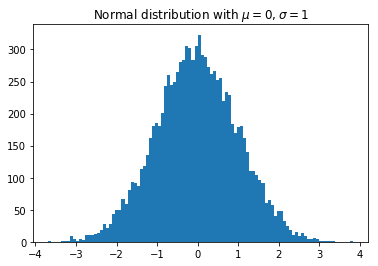

In [8]:
x = np.random.randn(10000)
plt.hist(x, 100)
plt.title(r'Normal distribution with $\mu=0, \sigma=1$')
plt.savefig('matplotlib_histogram.png')
plt.show()

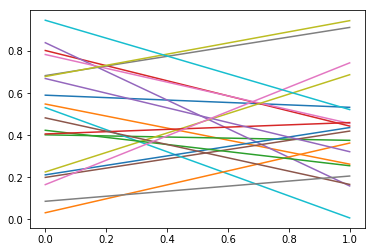

In [9]:
# interactive
def on_press(event):
    if event.inaxes is None: return
    for line in event.inaxes.lines:
        if event.key=='t':
            visible = line.get_visible()
            line.set_visible(not visible)
    event.inaxes.figure.canvas.draw()

fig, ax = plt.subplots(1)
fig.canvas.mpl_connect('key_press_event', on_press)
ax.plot(np.random.rand(2, 20))
plt.show()

Some special things:
Star args means the function supports any number of unnamed arguments. The DubStar Q also means that it supports any number of named arguments. This makes the function declaration very flexible since you can pass in basically any number of arguments, named or not. But it makes it difficult to know what is an appropriate argument. Arguments will be interpreted as X, Y pairs. 

Another thing is a function on a module named plot. Taking for instance pie plot the scripting interface is managing a lot of objects. It keeps track of the latest figure, of sub plots and of the axis objects. Moreover, it actually hides some of these behind methods of its own. So, the pie plot module itself has a function which is called plot. But it redirects calls to this function to the current axis object. This can be somehow confusing.

Ther is a comparable approach that's a bit more verbose (sometimes called matplotlib object API, directly interfacing with the artist layer). --> FigureCanvasAgg

In [4]:
# First let's set the backend without using mpl.use() from the scripting layer
from matplotlib.backends.backend_agg import FigureCanvasAgg
from matplotlib.figure import Figure
# create a new figure
fig = Figure()
# associate fig with the backend
canvas = FigureCanvasAgg(fig)
# add a subplot to the fig
ax = fig.add_subplot(111)
# plot the point (3,2)
ax.plot(3, 2, '.')
# save the figure to test.png
# Now, the backend that we're using, the one for the jupiter notebooks, isn't able to render this directly. 
# Since it expects the scripting layer pie plot to have created all of the objects. 
canvas.print_png('test.png')

<IPython.core.display.Javascript object>


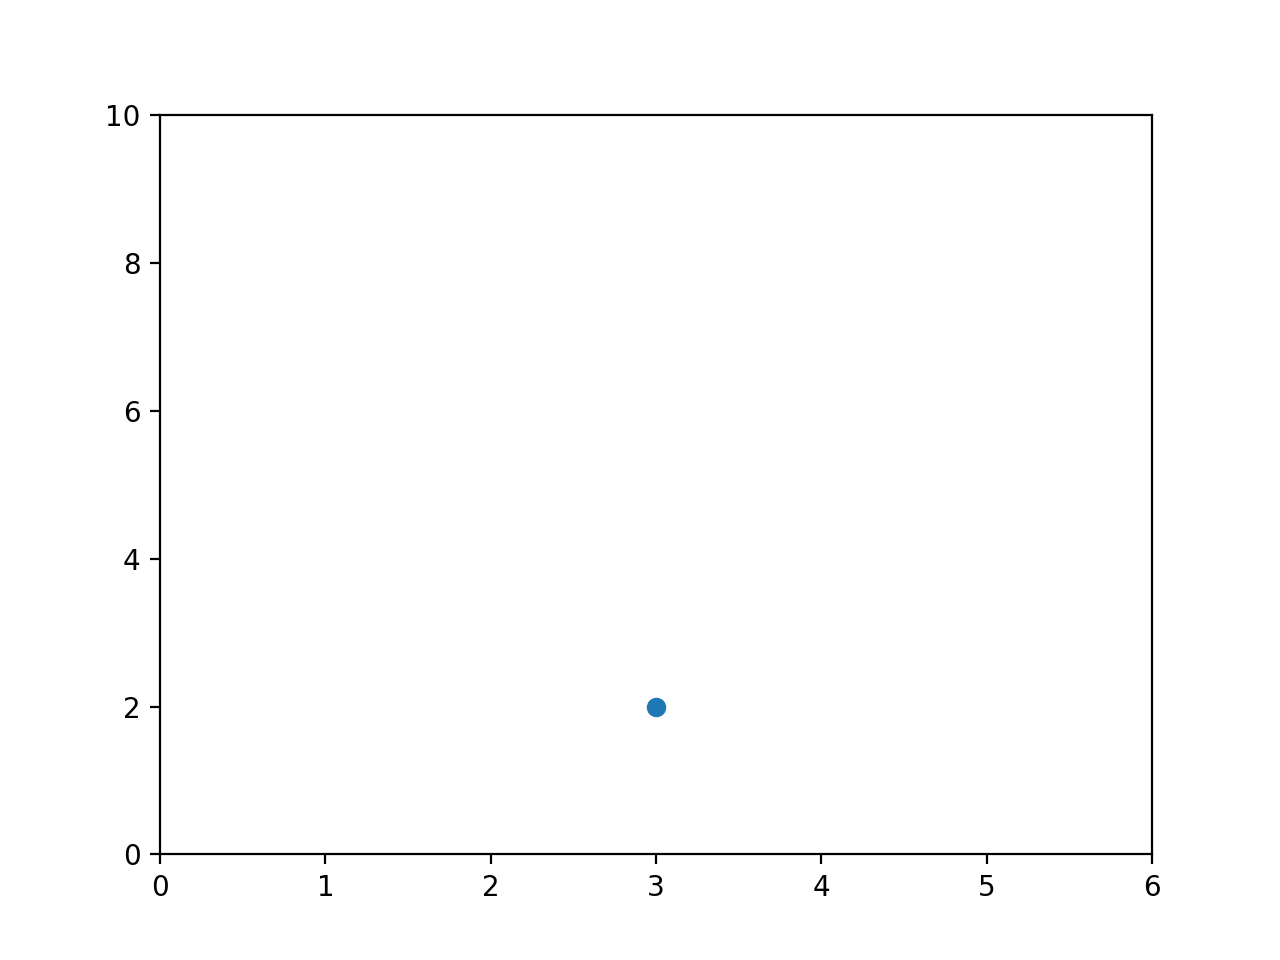

[0, 6, 0, 10]

In [34]:
# pyplot checks if there a figure already exists, here we create a new figure
plt.figure()
# plot the point (3,2) using the circle marker
plt.plot(3, 2, 'o')
# get the current axes
ax = plt.gca()
# Set axis properties [xmin, xmax, ymin, ymax]
ax.axis([0,6,0,10])

The axis function takes four parameters: a minimum value for x, which we'll put at zero, a maximum value for x, which we'll put it at six. In corresponding minimum and maximum values for Y which we'll put it zero and 10. Since we're doing this with the scripting layer once we run the jupiter cell it render to the NBA back end as we might expect. 

Pi plot doing that when we call the plot function. It's determining what shape we want from the string, the location associate with that shape, then it's creating a patch object and adding that to the axes. 

If we make subsequent calls to the plot function this will add more data to our chart.You can see that when this is done, the points are rendered in different colors. As the axis recognizes them as different data series. 

We can go further with the axis object to the point where we can actually get all of the child objects that that axis contains. 

We do this with the axis get children function. Here we can see that there's actually three line 2D objects contained in this axis. These are our data points. The number of spines, which are actual renderings of the borders of the frame, including tic markers, two axis objects, and a bunch of text, which are the labels for the chart. There's even a rectangle, which is the background for the axis. 
 

<IPython.core.display.Javascript object>


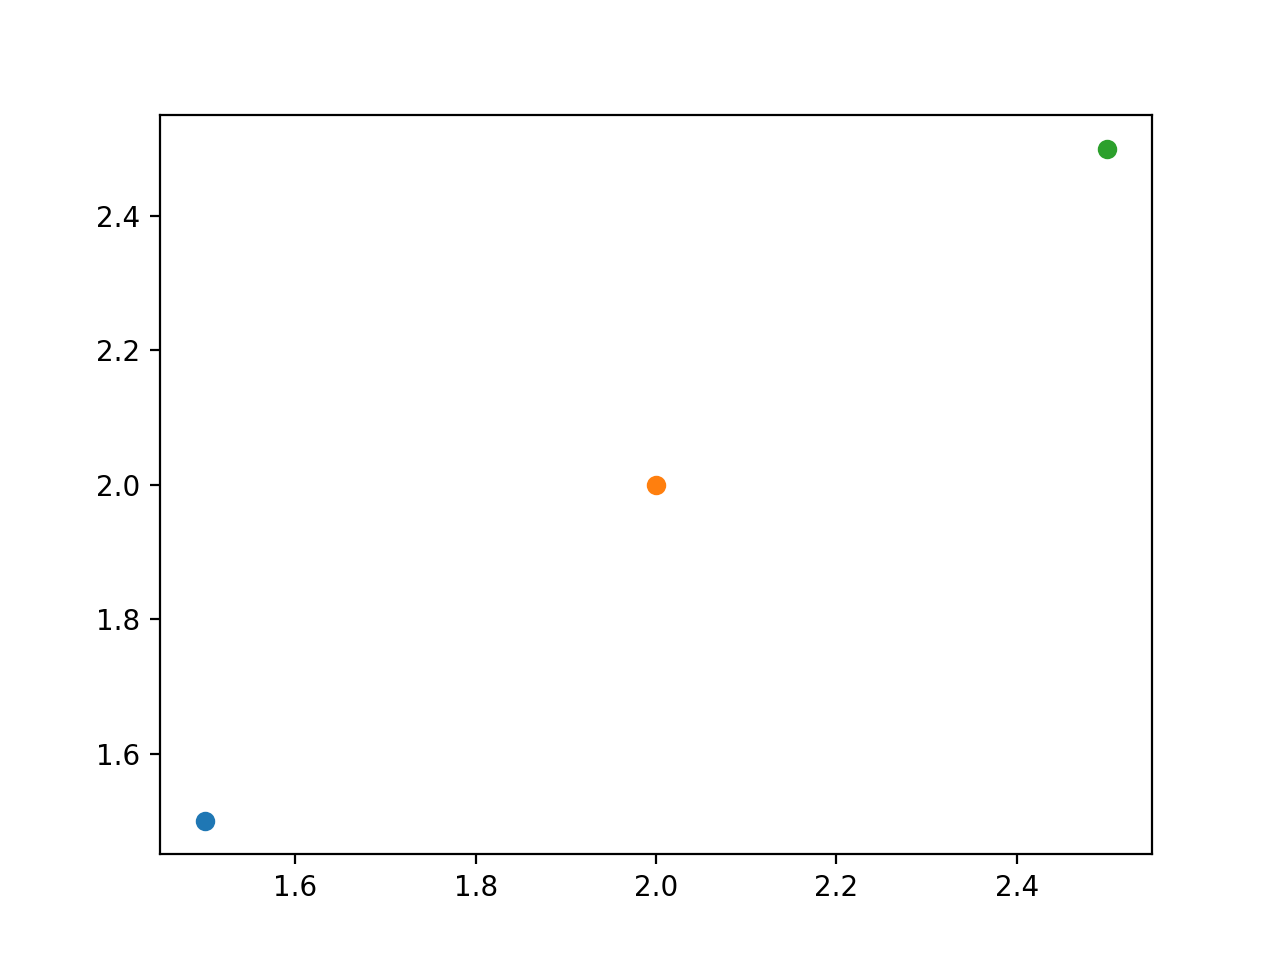

In [35]:
# create a new figure
plt.figure()

# plot the point (1.5, 1.5) using the circle marker
plt.plot(1.5, 1.5, 'o')
# plot the point (2, 2) using the circle marker
plt.plot(2, 2, 'o')
# plot the point (2.5, 2.5) using the circle marker
plt.plot(2.5, 2.5, 'o')
# get current axes
ax = plt.gca()
# get all the child objects the axes contains
ax.get_children()

## Scatterplots
In matplotlib, data needs to conform to NumPy arrays. But pandas is built on top of NumPy data points, so this is as easy as projecting the column that we're interested in. 

In [36]:
# recap list comprehension
noprimes = [j for i in range(2, 8) for j in range(i*2, 50, i)]
primes = [x for x in range(2, 50) if x not in noprimes]
print(primes)

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47]


In [37]:
# words
words = 'The quick brown fox jumps over the lazy dog'.split()
print(words)
['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']
stuff = [[w.upper(), w.lower(), len(w)] for w in words]
stuff

['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']


[['THE', 'the', 3],
 ['QUICK', 'quick', 5],
 ['BROWN', 'brown', 5],
 ['FOX', 'fox', 3],
 ['JUMPS', 'jumps', 5],
 ['OVER', 'over', 4],
 ['THE', 'the', 3],
 ['LAZY', 'lazy', 4],
 ['DOG', 'dog', 3]]

In [38]:
# use lambda and map instead
stuff = map(lambda w: [w.upper(), w.lower(), len(w)], words)

## Recap zip
Also remember that zip has lazy evaluation because it's actually a generator in Python 3 which means you need to use the list function if you want to see the results of iterating over zip.

In [39]:
# convert the two lists into a list of pairwise tuples
zip_generator = zip([1,2,3,4,5], [6,7,8,9,10])
print('print list:', list(zip_generator))
# or the single star *unpacks a collection into positional arguments
zip_generator = zip([1,2,3,4,5], [6,7,8,9,10])
print("unpack with *:", *zip_generator)
zip_generator

print list: [(1, 6), (2, 7), (3, 8), (4, 9), (5, 10)]
unpack with *: (1, 6) (2, 7) (3, 8) (4, 9) (5, 10)


In [40]:
# unpack the data back into 2 lists
zip_generator = zip([1,2,3,4,5], [6,7,8,9,10])
# When you pass a list or an interval more generally to a function and prepend it with an 
# asterisk,  each item is taken out of the iterable and passed as a separate argument.
x, y = zip(*zip_generator) # This is like calling zip((1, 6), (2, 7), (3, 8), (4, 9), (5, 10))
print(x)
print(y)

(1, 2, 3, 4, 5)
(6, 7, 8, 9, 10)


<IPython.core.display.Javascript object>


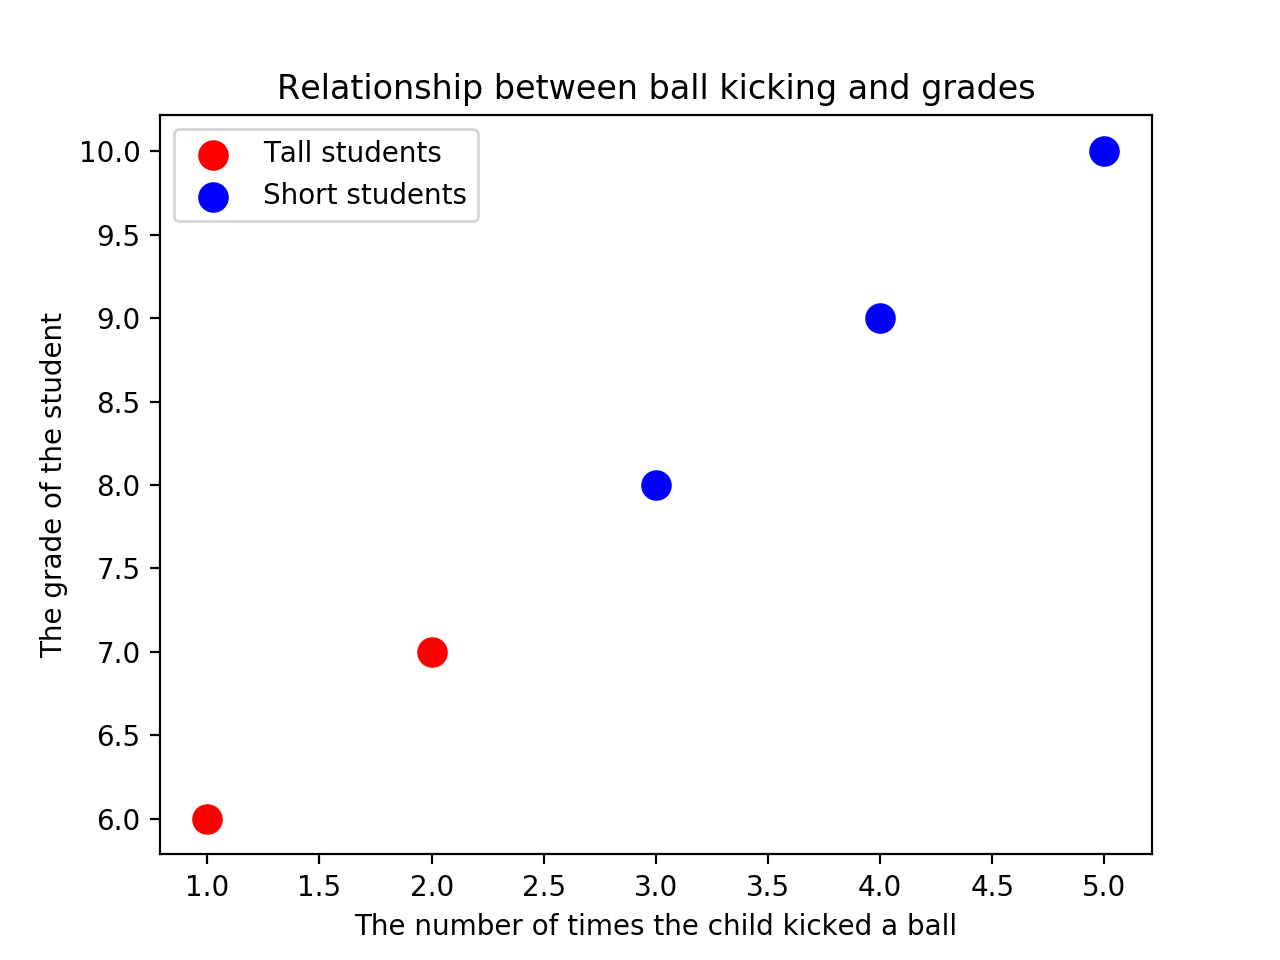

In [41]:
plt.figure()
# plot a data series 'Tall students' in red using the first two elements of x and y
plt.scatter(x[:2], y[:2], s=100, c='red', label='Tall students')
# plot a second data series 'Short students' in blue using the last three elements of x and y 
plt.scatter(x[2:], y[2:], s=100, c='blue', label='Short students')
# add a label to the x axis
plt.xlabel('The number of times the child kicked a ball')
# add a label to the y axis
plt.ylabel('The grade of the student')
# add a title
plt.title('Relationship between ball kicking and grades')


In [42]:
# add a legend (uses the labels from plt.scatter)
plt.legend()

In [43]:
# add the legend to loc=4 (the lower right hand corner), also gets rid of the frame and adds a title
plt.legend(loc=4, frameon=False, title='Legend')

In [44]:
# get children from current axes (the legend is the second to last item in this list)
plt.gca().get_children()
legend = plt.gca().get_children()[-2]

In [45]:
# import the artist class from matplotlib
from matplotlib.artist import Artist

def rec_gc(art, depth=0):
    if isinstance(art, Artist):
        # increase the depth for pretty printing
        print("  " * depth + str(art))
        for child in art.get_children():
            rec_gc(child, depth+2)

# Call this function on the legend artist to see what the legend is made up of
rec_gc(plt.legend())

Legend
            Text(0,0,'None')
                        Text(0,0,'Tall students')
                        Text(0,0,'Short students')
    FancyBboxPatch(0,0;1x1)


## Line Plots
Differences to scatter plot:
1. only give y-axes values to our plot call, no x axes values. Instead, the plot function was smart enough to figure out that what we wanted was to use the index of the series as the x value.
2. The plot identifies this as two series of data and that the colors of the data from the series are different including the data points and the lines between the data points. This is different from the scatter plot which required us to label the lines directly. 
3. Like all good Python libraries matplotlib invents a string based mini language for commonly used formatting. For instance, we could use an s inside of the formatting string which would plot another point using a square marker. Or we could use a series of dashes and dots to identify that a line should be dashed instead of solid. Here, let's plot another series. 

If you use tinme scales take care of taht standard library does it in two different ways, while NumPy as dozen replacement libraries for date times in Python.
You can use helper library in Pandas called to datetime. This specifically converts NumPy dates into standard library dates which is what matplotlib is expecting. 

linestyles = ['-', '--', '-.', ':']

<IPython.core.display.Javascript object>


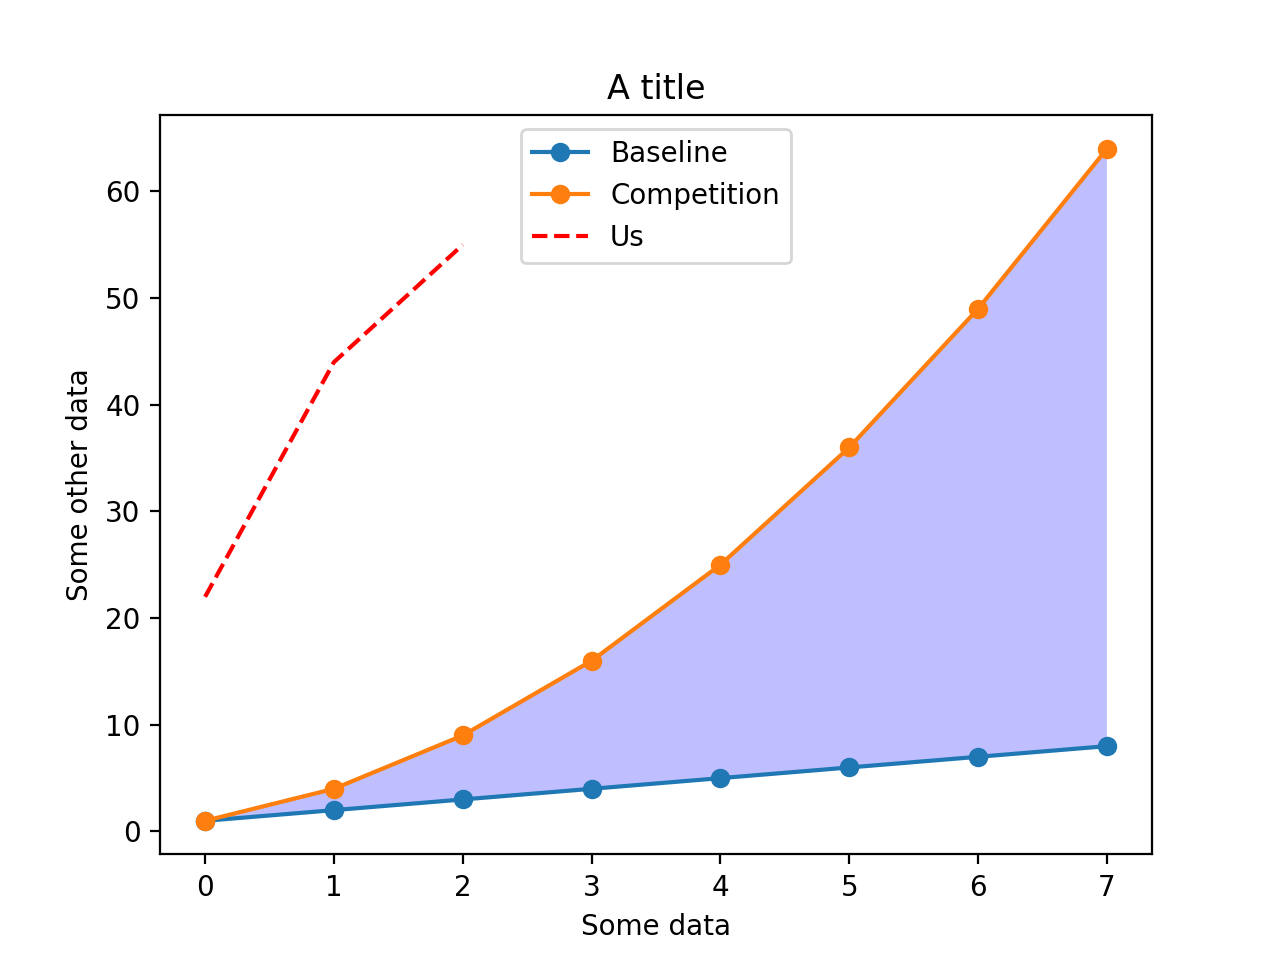

In [46]:
linear_data = np.array([1,2,3,4,5,6,7,8])
# use broadcasting to create a second one
exponential_data = linear_data**2
plt.figure()
# plot the linear data and the exponential data
plt.plot(linear_data, '-o', exponential_data, '-o')

In [47]:
# plot another series with a dashed red line
plt.plot([22,44,55], '--r')

In [48]:
plt.xlabel('Some data')
plt.ylabel('Some other data')
plt.title('A title')
# add a legend with legend entries (because we didn't have labels when we plotted the data series)
plt.legend(['Baseline', 'Competition', 'Us'])

In [49]:
# fill the area between the linear data and exponential data
# Great way to show, for instance, the standard deviation of results or error bars. 
plt.gca().fill_between(range(len(linear_data)), 
                       linear_data, exponential_data, 
                       facecolor='blue', 
                       alpha=0.25)

<IPython.core.display.Javascript object>


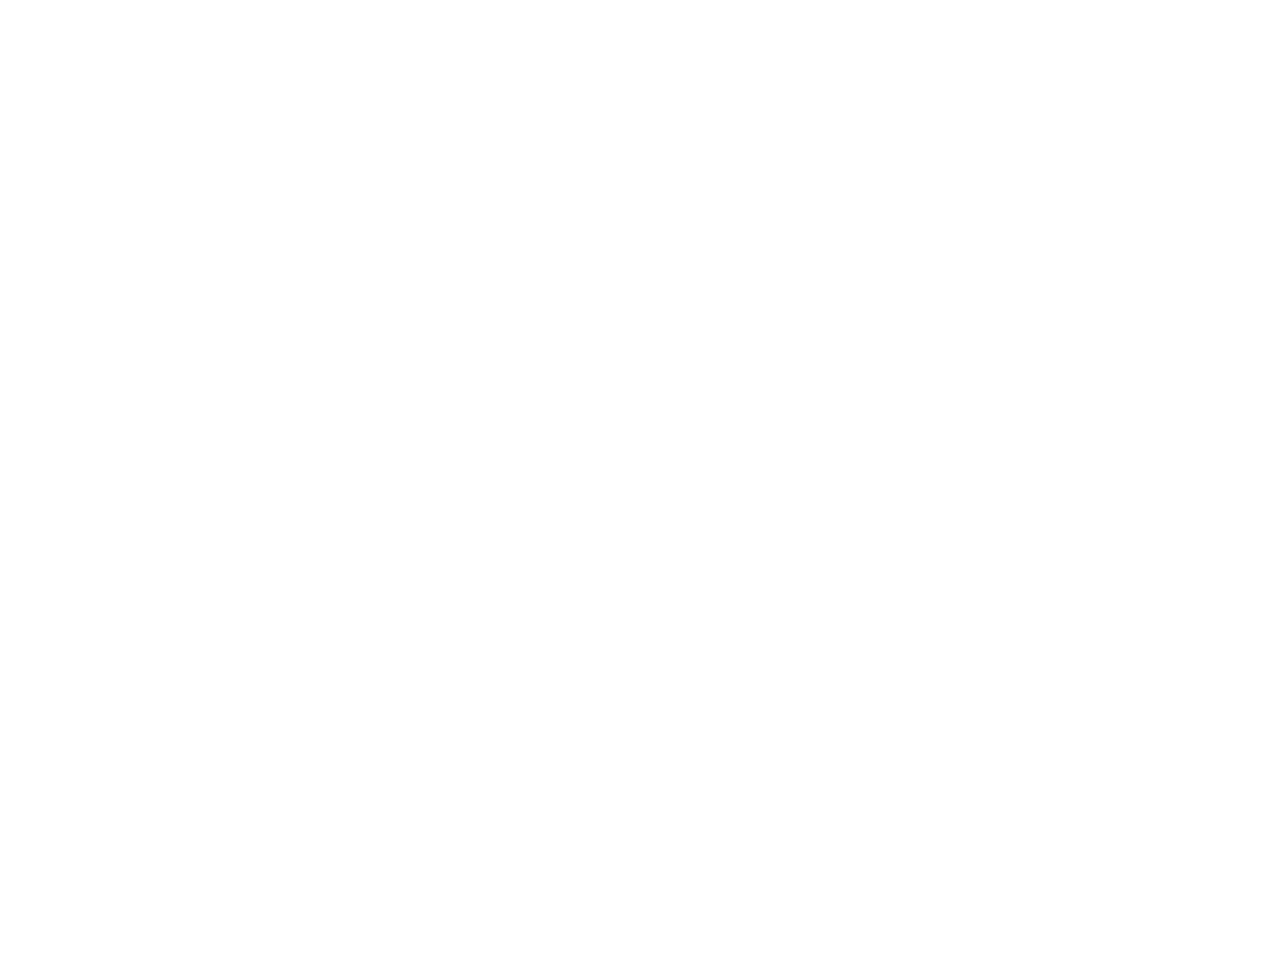

In [50]:
# date time handling  is pain points in data science in Python . 
# The standard library does it in two different ways, while NumPy as dozen 
# replacement libraries for date times in Python. 
plt.figure()
observation_dates = np.arange('2017-01-01', '2017-01-09', dtype='datetime64[D]')
# convert the map to a list to avoid error as map returns iterable and plt requires list
observation_dates = list(map(pd.to_datetime, observation_dates)) 
plt.plot(observation_dates, linear_data, '-o',  observation_dates, exponential_data, '-o')

In [51]:
# There are lots of  properties of the axes object For instance; you can get the grid lines,
# the tick locations for both major and minor ticks and further
x = plt.gca().xaxis
# in ordwr to avoid overlap rotate the tick labels for the x axis
for item in x.get_ticklabels():
    item.set_rotation(45)
# adjust the subplot so the text doesn't run off the image
plt.subplots_adjust(bottom=0.25)

## Latex notation
Matplotlib has a fairly strong connection to LaTeX a type setting language used by mathematicians and scientists. This means that you can use a subset of LaTeX directly in your labels then matplotlib will render them as equations Here, for instance, we can set the title of the axes so that there's an x squared directly in it. We do this by escaping to LaTeX math mode with dollar signs. 

In [52]:
ax = plt.gca()
ax.set_xlabel('Date')
ax.set_ylabel('Units')
# you can add mathematical expressions in any text element
ax.set_title("Exponential ($x^2$) vs. Linear ($x$) performance")

## Bar Charts
The foundation is there, but some of the ways, such as plotting several series of data in groups across time, are missing. 
Other features for instance adding error bars to each bar as well, using the y-error parameter exist.
For example, each of our pieces of data in the linear data might actually be a mean value, computed from many different observations. So we could just create a list of error values. 

In [53]:
new_xvals = []
# plot another set of bars, adjusting the new xvals to make up for the first set of bars plotted
for item in xvals:
    new_xvals.append(item+0.3)
plt.bar(new_xvals, exponential_data, width = 0.3 ,color='red')

<Container object of 8 artists>

In [54]:
from random import randint
linear_err = [randint(0,15) for x in range(len(linear_data))] 
# This will plot a new set of bars with errorbars using the list of random error values
plt.bar(xvals, linear_data, width = 0.3, yerr=linear_err)

<Container object of 8 artists>

<IPython.core.display.Javascript object>


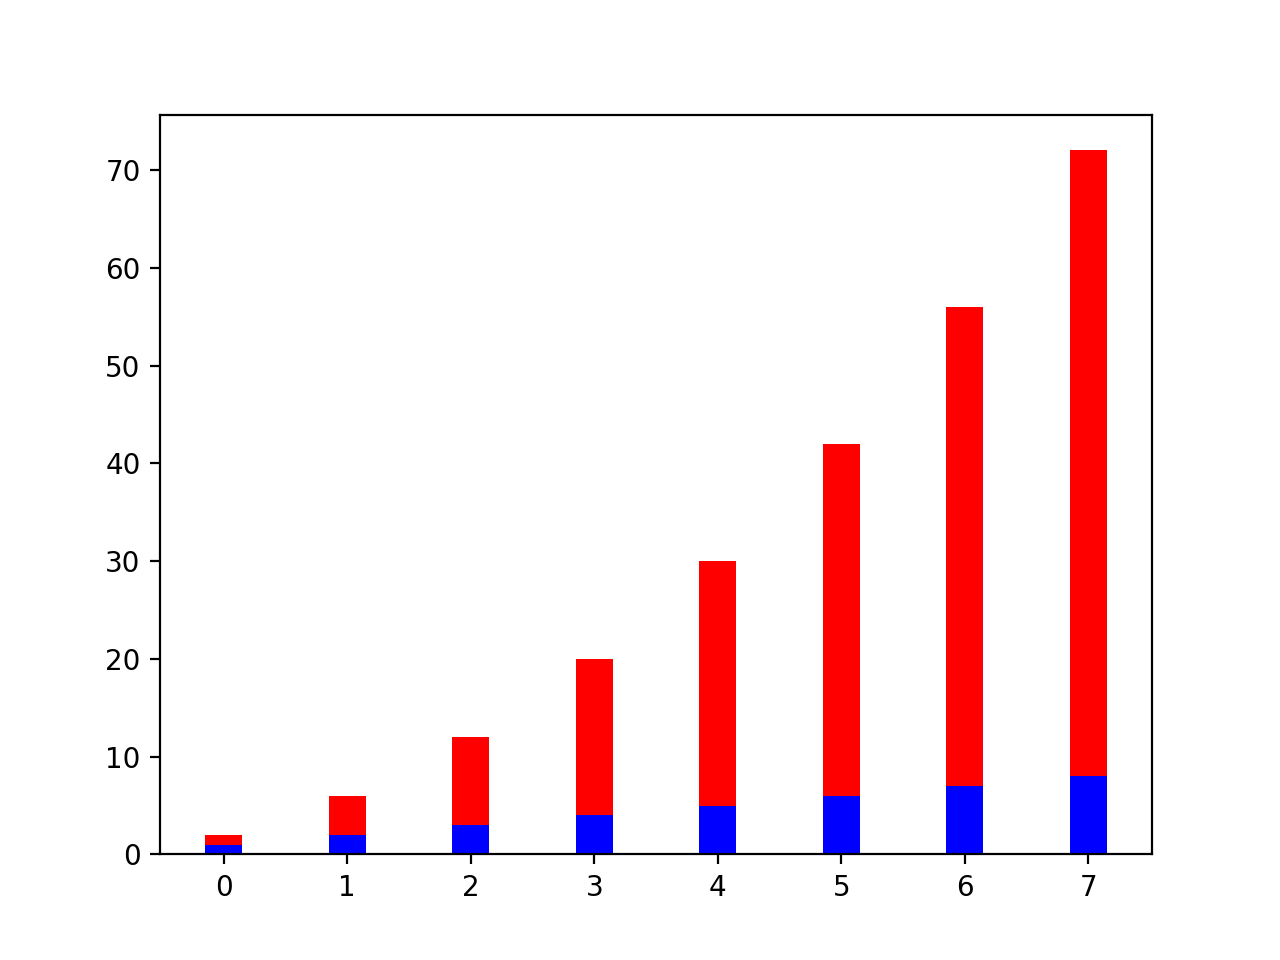

<Container object of 8 artists>

In [55]:
# stacked bar charts are also possible
plt.figure()
xvals = range(len(linear_data))
plt.bar(xvals, linear_data, width = 0.3, color='b')
plt.bar(xvals, exponential_data, width = 0.3, bottom=linear_data, color='r')

<IPython.core.display.Javascript object>


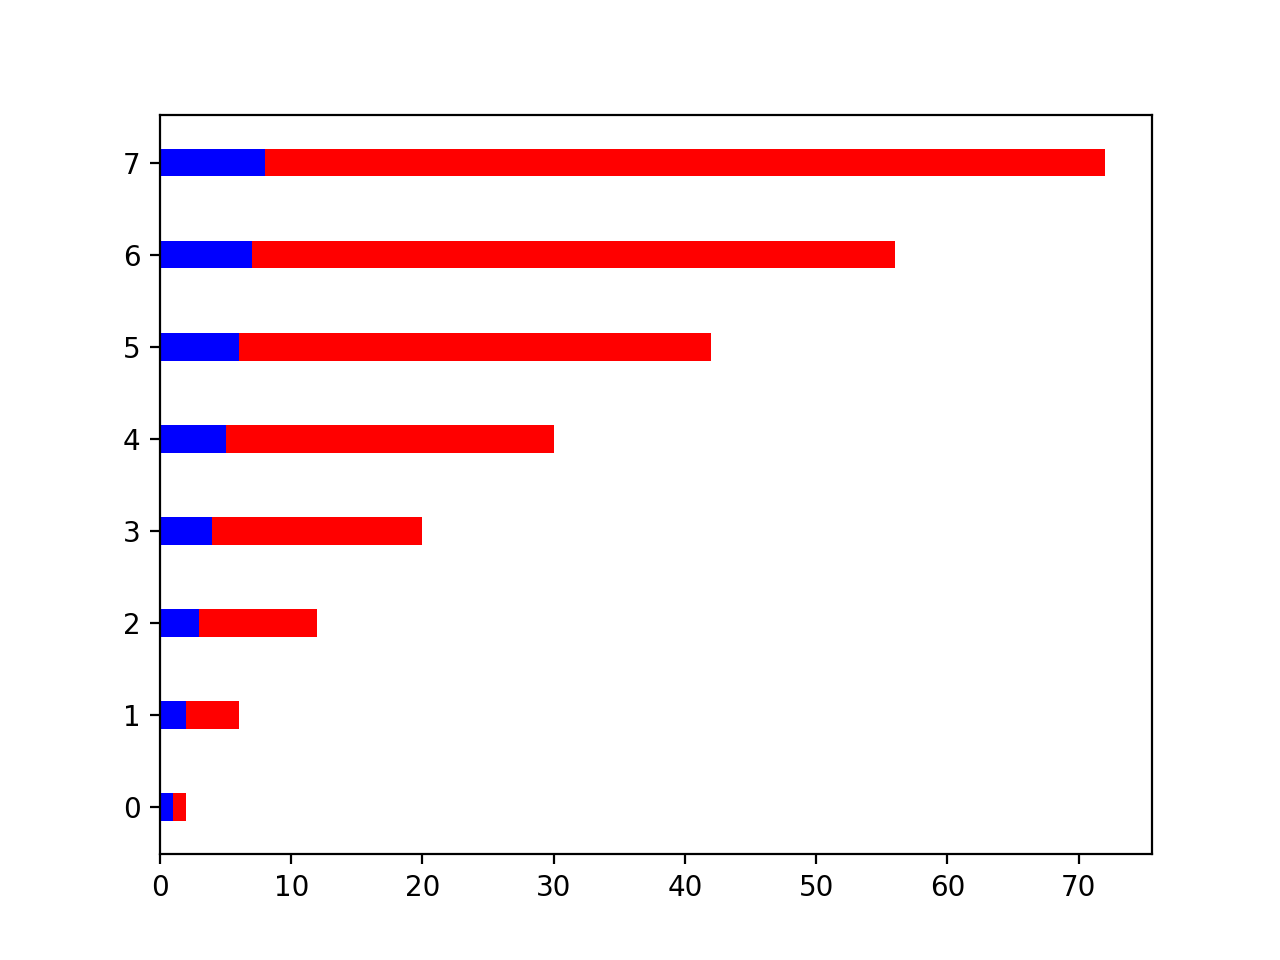

<Container object of 8 artists>

In [56]:
#  barh for horizontal bar charts
plt.figure()
xvals = range(len(linear_data))
plt.barh(xvals, linear_data, height = 0.3, color='b')
plt.barh(xvals, exponential_data, height = 0.3, left=linear_data, color='r')

<IPython.core.display.Javascript object>


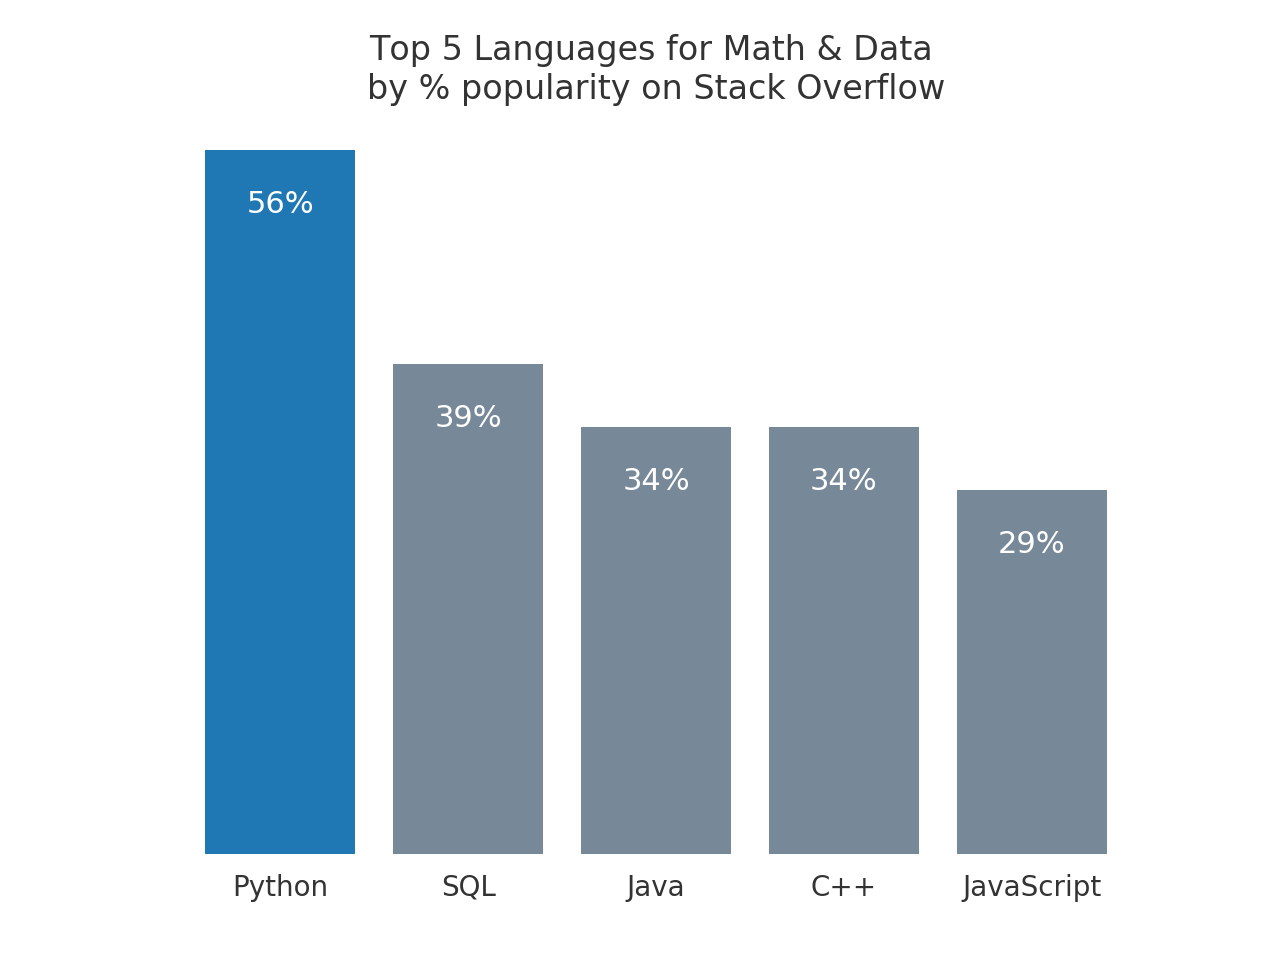

In [57]:
plt.figure()

languages =['Python', 'SQL', 'Java', 'C++', 'JavaScript']
pos = np.arange(len(languages))
popularity = [56, 39, 34, 34, 29]
# change the bar color to be less bright blue
bars = plt.bar(pos, popularity, align='center', linewidth=0, color='lightslategrey')
# make one bar, the python bar, a contrasting color
bars[0].set_color('#1F77B4')

# soften all labels by turning grey
plt.xticks(pos, languages, alpha=0.8)
# remove the Y label since bars are directly labeled
#plt.ylabel('% Popularity', alpha=0.8)
plt.title('Top 5 Languages for Math & Data \nby % popularity on Stack Overflow', alpha=0.8)
# remove all the ticks (both axes), and tick labels on the Y axis
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')
# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)
# direct label each bar with Y axis values
for bar in bars:
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height() - 5, str(int(bar.get_height())) + '%', 
                 ha='center', color='w', fontsize=11)
plt.show()

## Date formatter
https://docs.python.org/3/library/datetime.html
use date formatter:
x = plt.gca().xaxis
x.set_major_formatter(DateFormatter("%b"))

## Color maps
Any colormap listed here can be reversed by appending "_r" (e.g., "pink_r").
These colormaps are divided into the following categories:

Sequential:
    These colormaps are approximately monochromatic colormaps varying smoothly
    between two color tones---usually from low saturation (e.g. white) to high
    saturation (e.g. a bright blue). Sequential colormaps are ideal for
    representing most scientific data since they show a clear progression from
    low-to-high values.

Diverging:
    These colormaps have a median value (usually light in color) and vary
    smoothly to two different color tones at high and low values. Diverging
    colormaps are ideal when your data has a median value that is significant
    (e.g.  0, such that positive and negative values are represented by
    different colors of the colormap).

Qualitative:
    These colormaps vary rapidly in color. Qualitative colormaps are useful for
    choosing a set of discrete colors. For example::

        color_list = plt.cm.Set3(np.linspace(0, 1, 12))

    gives a list of RGB colors that are good for plotting a series of lines on
    a dark background.
    
    
In addition there are named colors (see below)

<IPython.core.display.Javascript object>


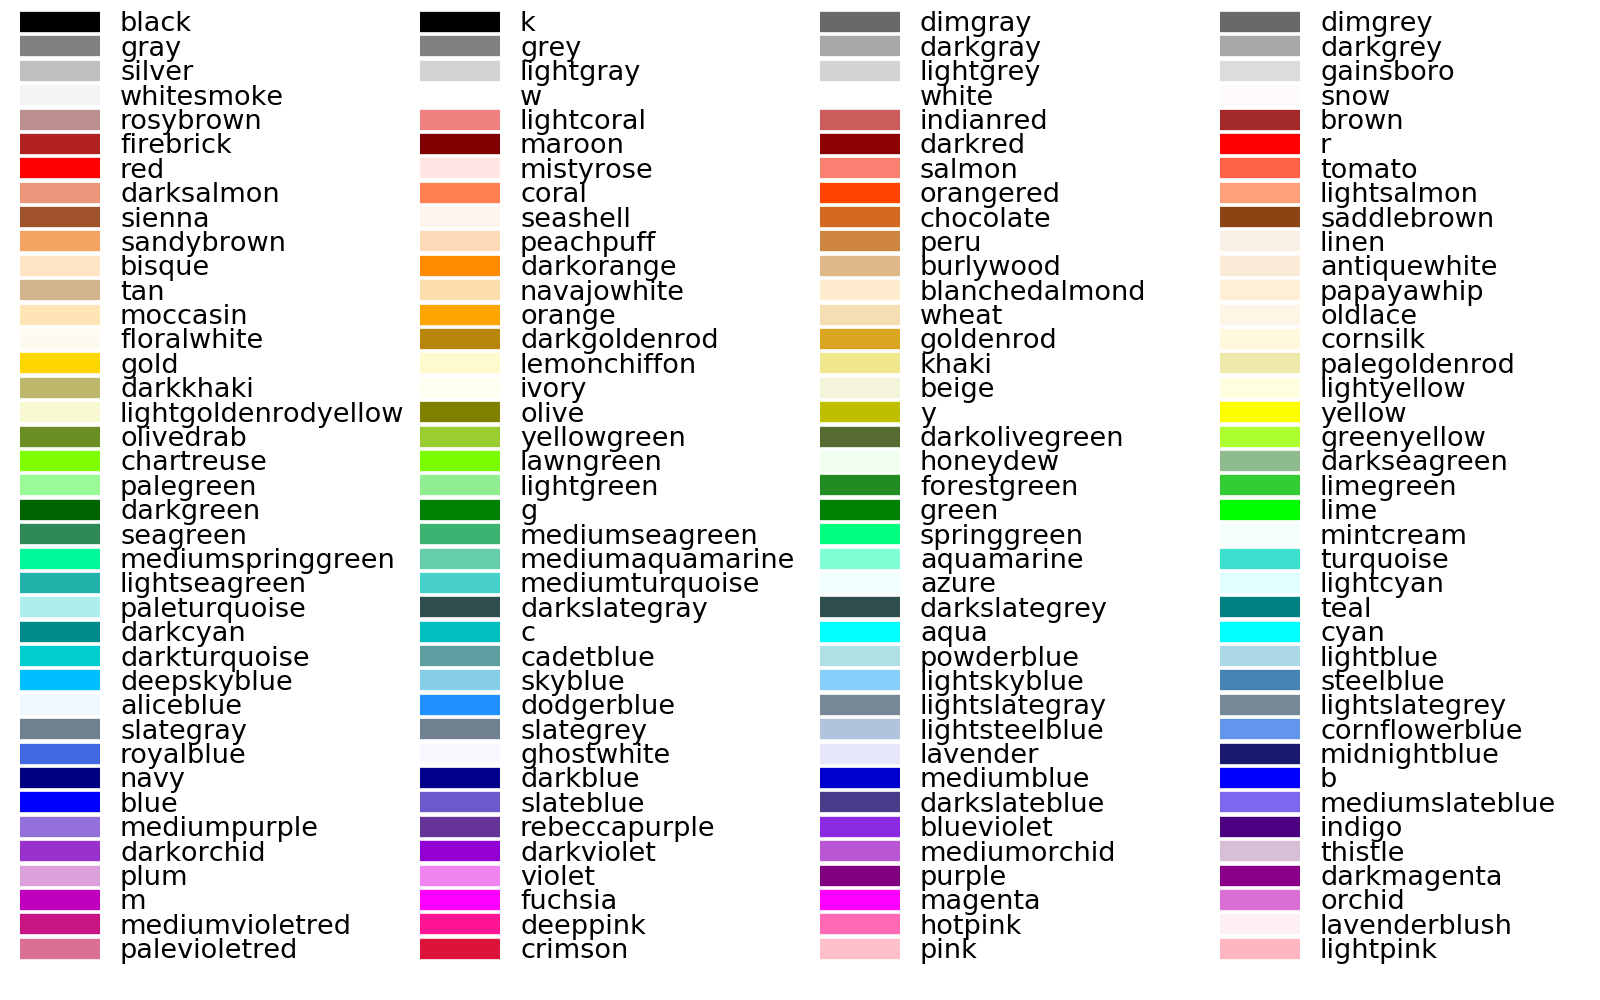

In [15]:
from matplotlib import colors as mcolors


colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

# Sort colors by hue, saturation, value and name.
by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
                for name, color in colors.items())
sorted_names = [name for hsv, name in by_hsv]

n = len(sorted_names)
ncols = 4
nrows = n // ncols + 1

fig, ax = plt.subplots(figsize=(8, 5))

# Get height and width
X, Y = fig.get_dpi() * fig.get_size_inches()
h = Y / (nrows + 1)
w = X / ncols

for i, name in enumerate(sorted_names):
    col = i % ncols
    row = i // ncols
    y = Y - (row * h) - h

    xi_line = w * (col + 0.05)
    xf_line = w * (col + 0.25)
    xi_text = w * (col + 0.3)

    ax.text(xi_text, y, name, fontsize=(h * 0.8),
            horizontalalignment='left',
            verticalalignment='center')

    ax.hlines(y + h * 0.1, xi_line, xf_line,
              color=colors[name], linewidth=(h * 0.6))

ax.set_xlim(0, X)
ax.set_ylim(0, Y)
ax.set_axis_off()

fig.subplots_adjust(left=0, right=1,
                    top=1, bottom=0,
                    hspace=0, wspace=0)
plt.show()

# Subplots
The first argument of a subplot is the number of rows, the second the number of columns, and the third is the plot number. 
In matplotlib, a conceptual grid is overlayed on the figure. And a subplot command allows you to create axis to different portions of this grid. 
he norm with matplotlib is that you store the axis object that you get back from the subplot. But you can call subplot again. 

<IPython.core.display.Javascript object>


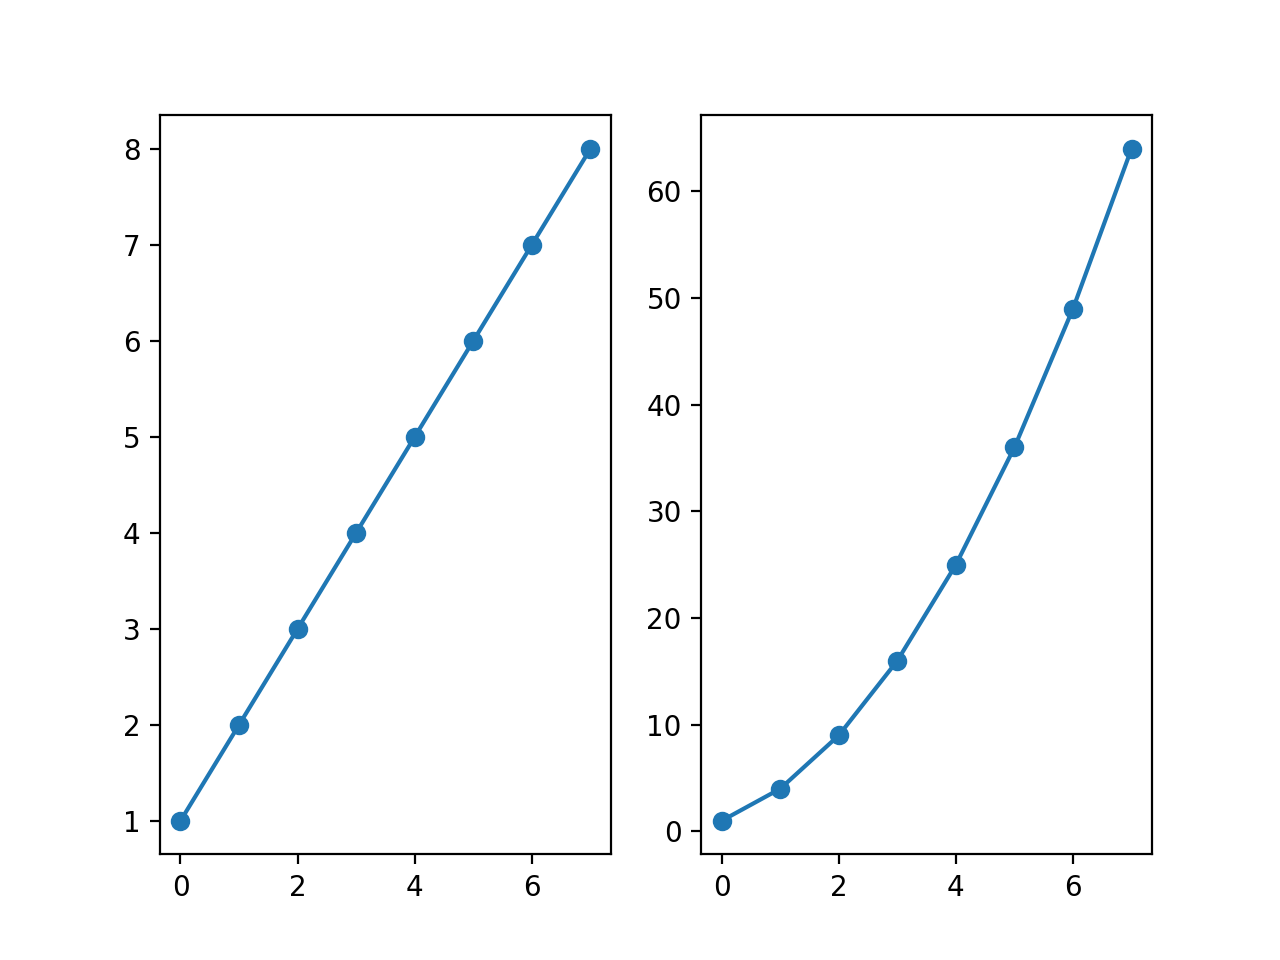

In [6]:
plt.figure()
# subplot with 1 row, 2 columns, and current axis is 1st subplot axes
plt.subplot(1, 2, 1)
linear_data = np.array([1,2,3,4,5,6,7,8])
plt.plot(linear_data, '-o')
# additional subplot on right hand side
exponential_data = linear_data**2 
# subplot with 1 row, 2 columns, and current axis is 2nd subplot axes
plt.subplot(1, 2, 2)
plt.plot(exponential_data, '-o')

<IPython.core.display.Javascript object>


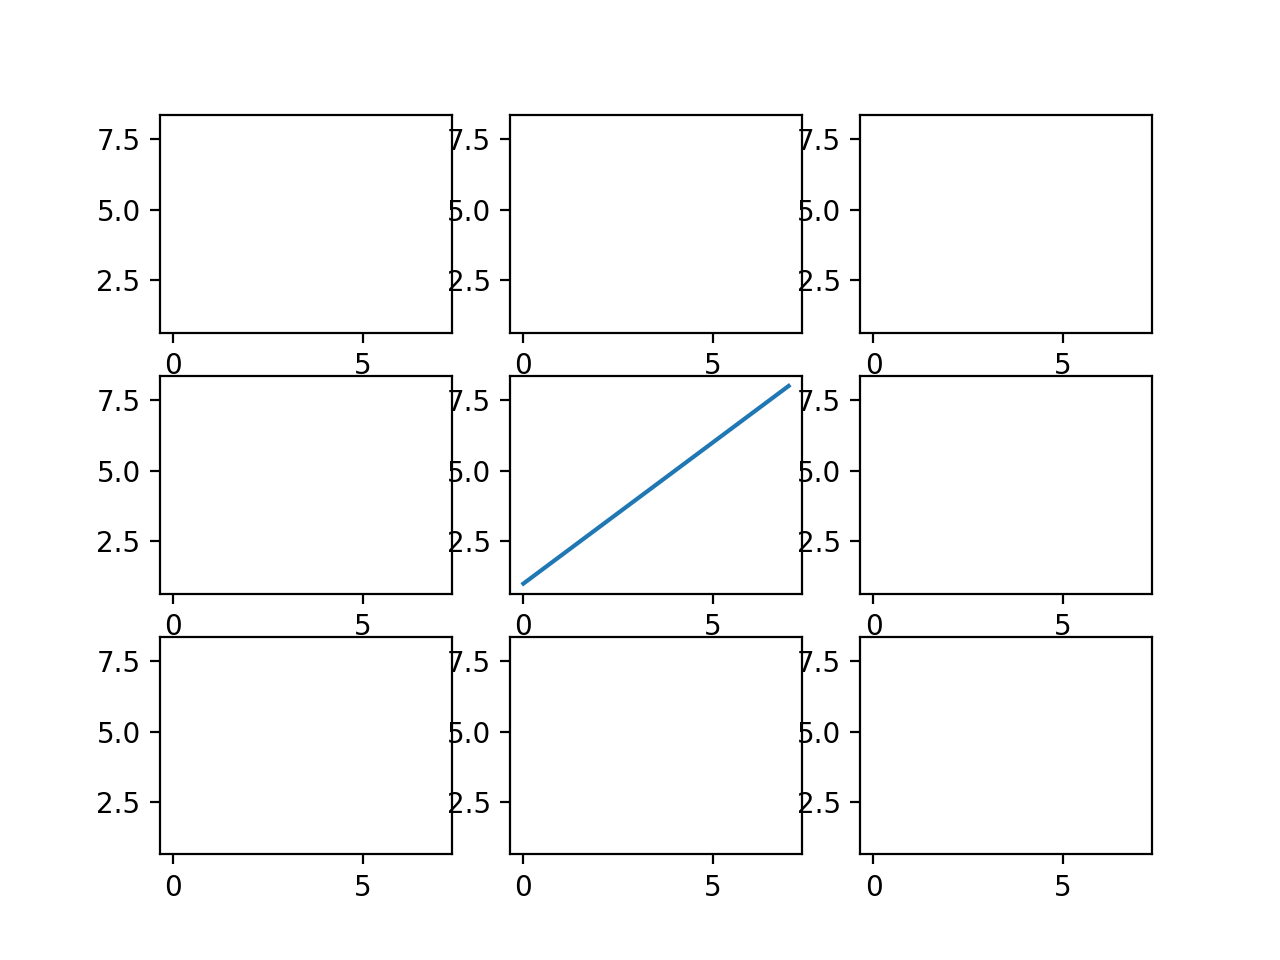

In [58]:
# create a 3x3 grid of subplots
fig, ((ax1,ax2,ax3), (ax4,ax5,ax6), (ax7,ax8,ax9)) = plt.subplots(3, 3, sharex=True, sharey=True)
# plot the linear_data on the 5th subplot axes 
ax5.plot(linear_data, '-')
# set inside tick labels to visible
for ax in plt.gcf().get_axes():
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_visible(True)
# necessary on some systems to update the plot
plt.gcf().canvas.draw()

## Histogramms
The x-axis values are labeled in terms of the distribution function. In the case of the normal distribution, this is usually in terms of standard deviations. 
So a histogram is just a bar chart where the x-axis is a given observation and the y-axis is the frequency with which that observation occurs. So we should be able to plot a given probability distribution by sampling from it.

By default, the histogram in Matplotlib uses ten bins(ten different bars). Thus, ten bins for n=10 is at best capturing ten unique values, while for n=10,000, many values have to be combined into a single bin. The numver of bins is a trade-off decision. The basic difficulty in selecting the number of bins is how to trade off the increased ‘accuracy’ that comes from adding more bins with the increased ‘cost’ of the additional bins.

Scott suggested using the Gaussian density as a reference standard, which leads to the data-based choice for the bin width of a × s × n−1/3, where a = 3.49 and s is an estimate of the standard deviation. (See also Terrell and Scott [10] and Terrell [9].) As Scott noted many authors advise that for real data sets histograms based on 5-20 bins usually suffice.
[Decision Tree Approach](http://users.stat.umn.edu/~gmeeden/papers/hist.pdf)

<IPython.core.display.Javascript object>


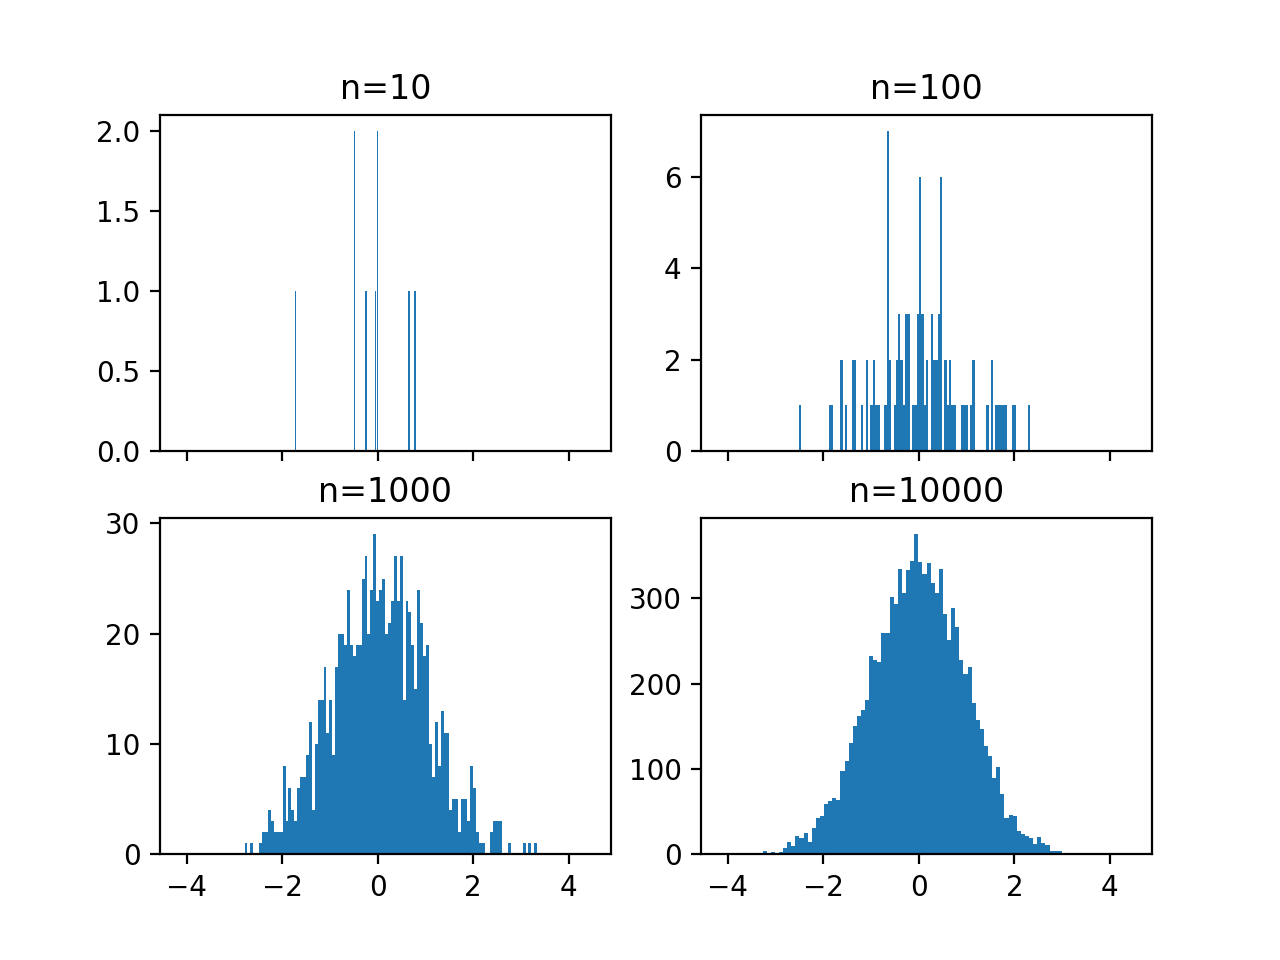

In [15]:
# repeat with number of bins set to 100
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
axs = [ax1,ax2,ax3,ax4]

for n in range(0,len(axs)):
    sample_size = 10**(n+1)
    sample = np.random.normal(loc=0.0, scale=1.0, size=sample_size)
    axs[n].hist(sample, bins=100)
    axs[n].set_title('n={}'.format(sample_size))

### GridSpec 
The GridSpec allows you to map axes over multiple cells in a grid. 
A scatter plot where the y values come from the normal distribution, and the x values come from a random distribution, and it's not totally clear from looking at this plot what the actual distributions are for each axis, but add two smaller plots, each histograms, to make this a bit more clear. 

<IPython.core.display.Javascript object>


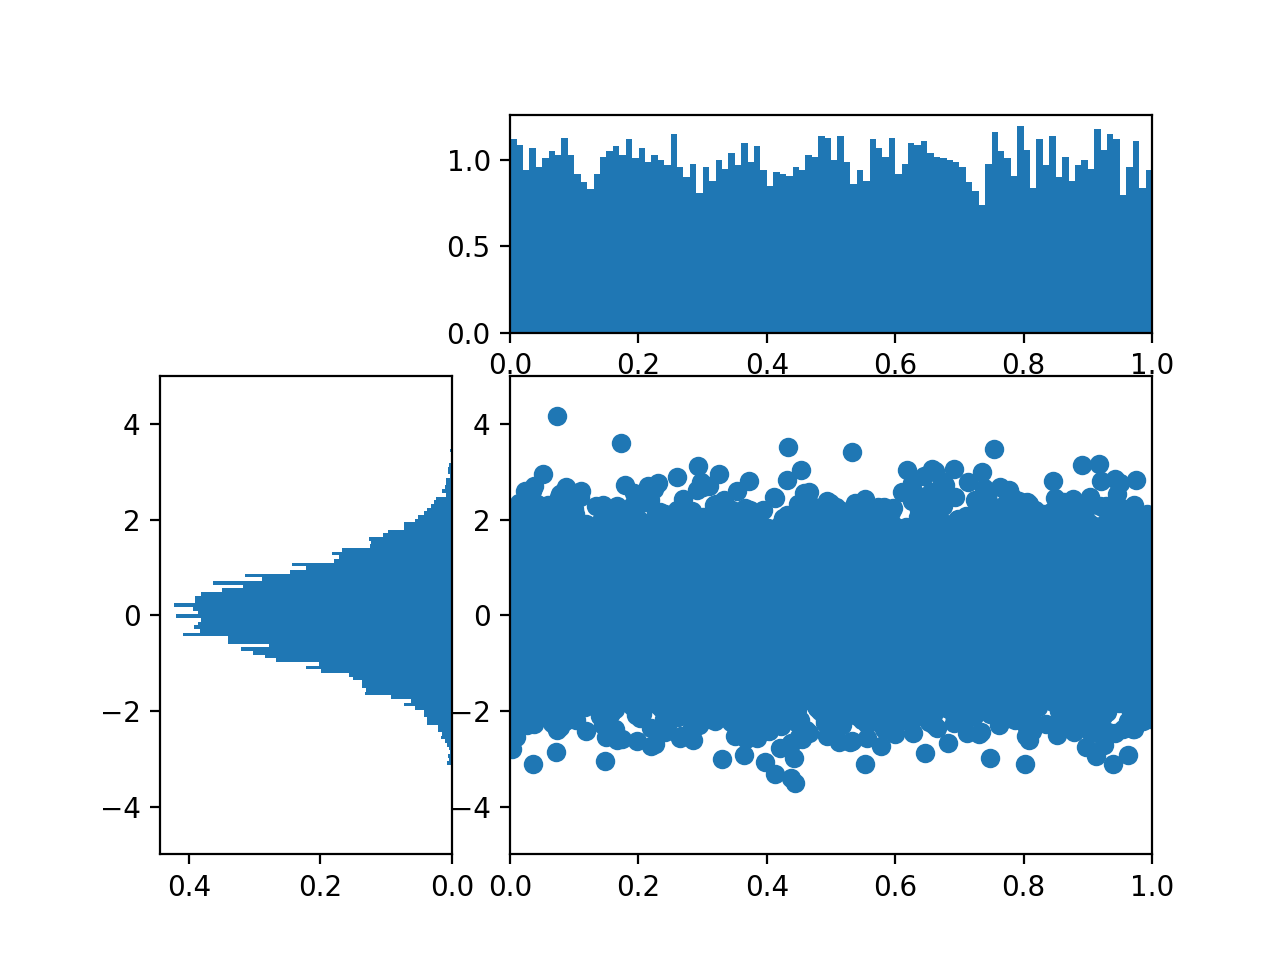

In [59]:
# use gridspec to partition the figure into subplots
import matplotlib.gridspec as gridspec
plt.figure()
gspec = gridspec.GridSpec(3, 3)
top_histogram = plt.subplot(gspec[0, 1:])
side_histogram = plt.subplot(gspec[1:, 0])
lower_right = plt.subplot(gspec[1:, 1:])
Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
lower_right.scatter(X, Y)
top_histogram.hist(X, bins=100)
s = side_histogram.hist(Y, bins=100, orientation='horizontal')

In [60]:
# clear the histograms and plot normed histograms
top_histogram.clear()
top_histogram.hist(X, bins=100, normed=True)
side_histogram.clear()
side_histogram.hist(Y, bins=100, orientation='horizontal', normed=True)
# flip the side histogram's x axis
side_histogram.invert_xaxis()
# change axes limits
for ax in [top_histogram, lower_right]:
    ax.set_xlim(0, 1)
for ax in [side_histogram, lower_right]:
    ax.set_ylim(-5, 5)

### Box Plot
The box plot simultaneously shows, for each sample, the median of each value, the minimum and maximum of the samples, and the interquartile range.
Sometimes also called a box-and-whisker plot is a method of showing aggregate statistics of various samples in a concise matter.

Recap the 4 quartiles: 
1. quartile: between the minimal value and the first 25% of the data. 
2. quartile: between the 25% mark and the 50% of the data. 
3. quartile: between 50 and 75% of the data. 
4. quartile: final piece of data is between the 75% and the maximum of the data. 

Like standard deviation, the interquartile range is a measure of variability of data. And it's common to plot this using a box plot. In a box plot, the mean, or the median, of the data is plotted as a straight line. Two boxes are formed, one above, which represents the 50% to 75% data group, and one below, which represents the 25% to 50% data group. Thin lines which are capped are then drawn out to the minimum and maximum values.

In [61]:
normal_sample = np.random.normal(loc=0.0, scale=1.0, size=10000)
random_sample = np.random.random(size=10000)
gamma_sample = np.random.gamma(2, size=10000)

df = pd.DataFrame({'normal': normal_sample, 
                   'random': random_sample, 
                   'gamma': gamma_sample})
df.describe()

gamma        normal        random
count  10000.000000  10000.000000  10000.000000
mean       2.008819     -0.001247      0.501936
std        1.409038      0.987606      0.289892
min        0.003343     -3.600666      0.000082
25%        0.976711     -0.672906      0.248960
50%        1.685574      0.005715      0.503248
75%        2.683135      0.662982      0.754248
max       11.379181      3.622574      0.999974

<IPython.core.display.Javascript object>


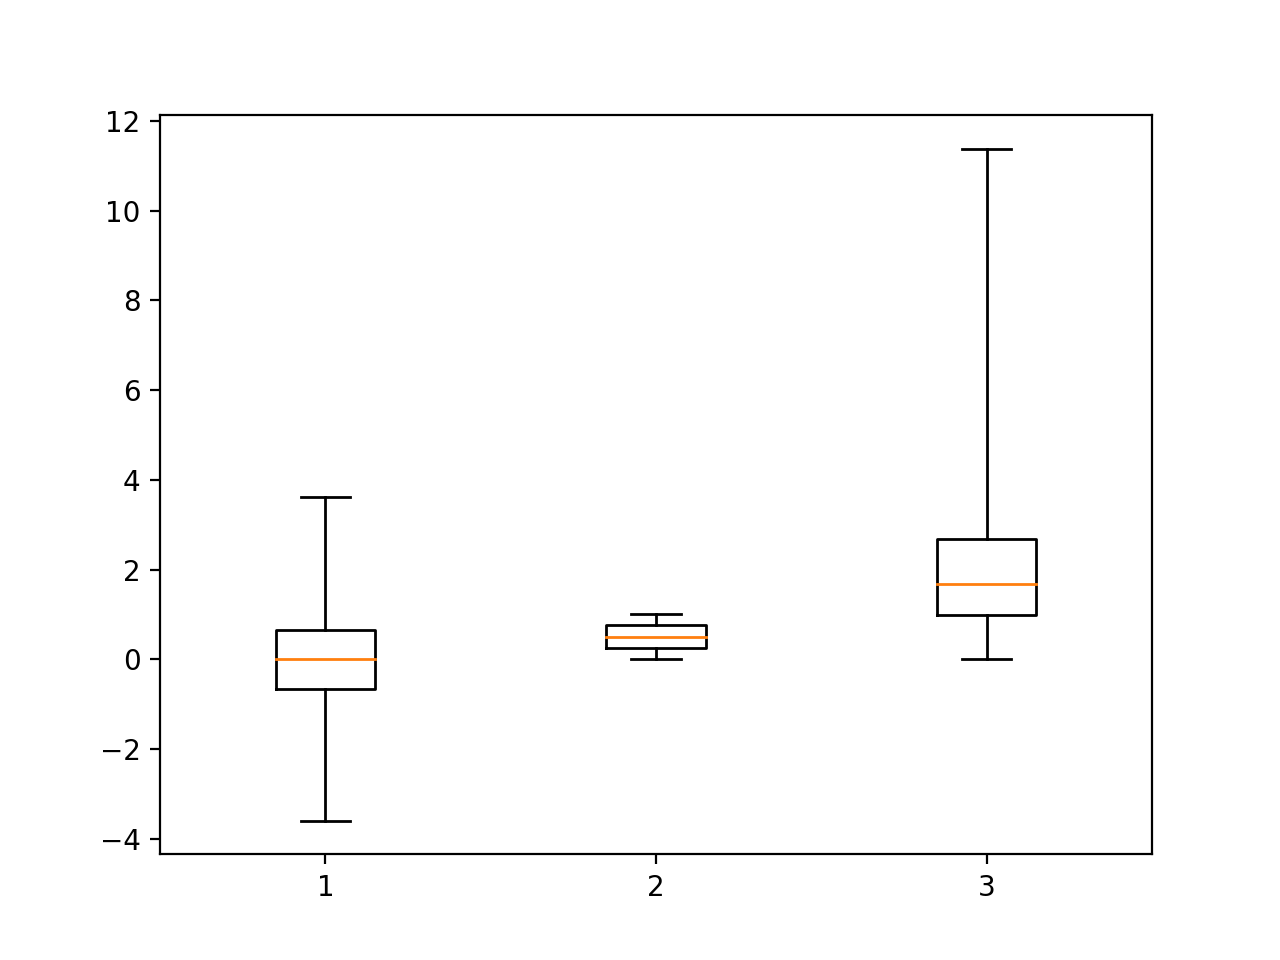

In [62]:
plt.figure()
# plot boxplots for all three of df's columns,
# _ if we don't assign the return value of plotting function to a variable, 
# the Jupiter Notebook will assume that we wanted to print that output. 
_ = plt.boxplot([ df['normal'], df['random'], df['gamma'] ], whis='range')

<IPython.core.display.Javascript object>


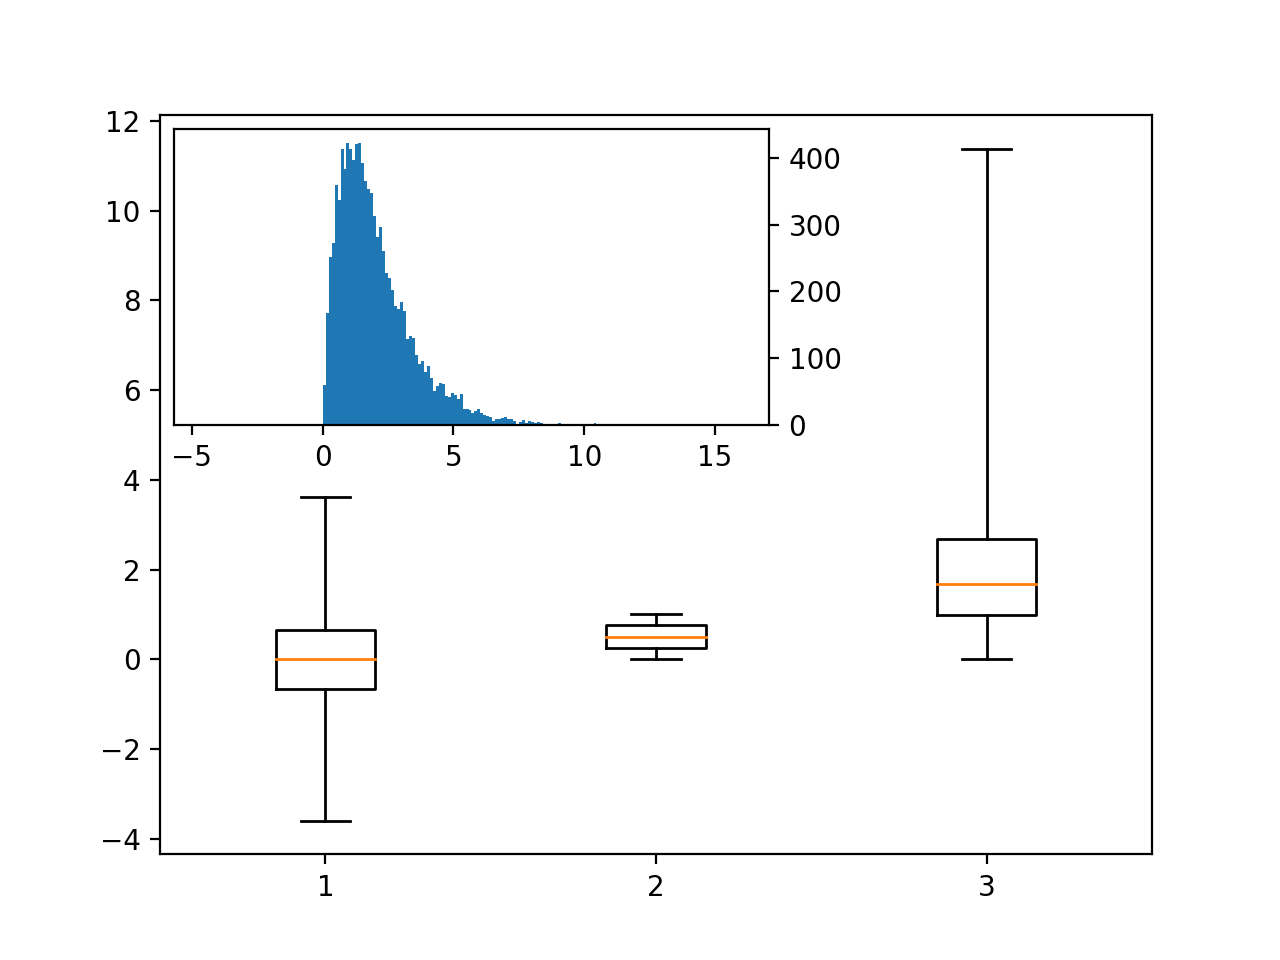

In [63]:
# inset axes whisker parameter
# set the whis parameter to be the range -i.e. set the whisker values out to the min/max values. 
import mpl_toolkits.axes_grid1.inset_locator as mpl_il
plt.figure()
plt.boxplot([ df['normal'], df['random'], df['gamma'] ], whis='range')
# overlay axis on top of another 
ax2 = mpl_il.inset_axes(plt.gca(), width='60%', height='40%', loc=2)
ax2.hist(df['gamma'], bins=100)
ax2.margins(x=0.5)
# switch the y axis ticks for ax2 to the right side
ax2.yaxis.tick_right()

**Whiskers**

The whis parameter set the whisker values out to the range between min/max values.
If `whis` argument isn't passed, boxplot defaults to showing 1.5*interquartile (IQR) whiskers with outliers.
This is one method of detecting outliers. And the points which are plotted beyond the whiskers are called fliers. 

<IPython.core.display.Javascript object>


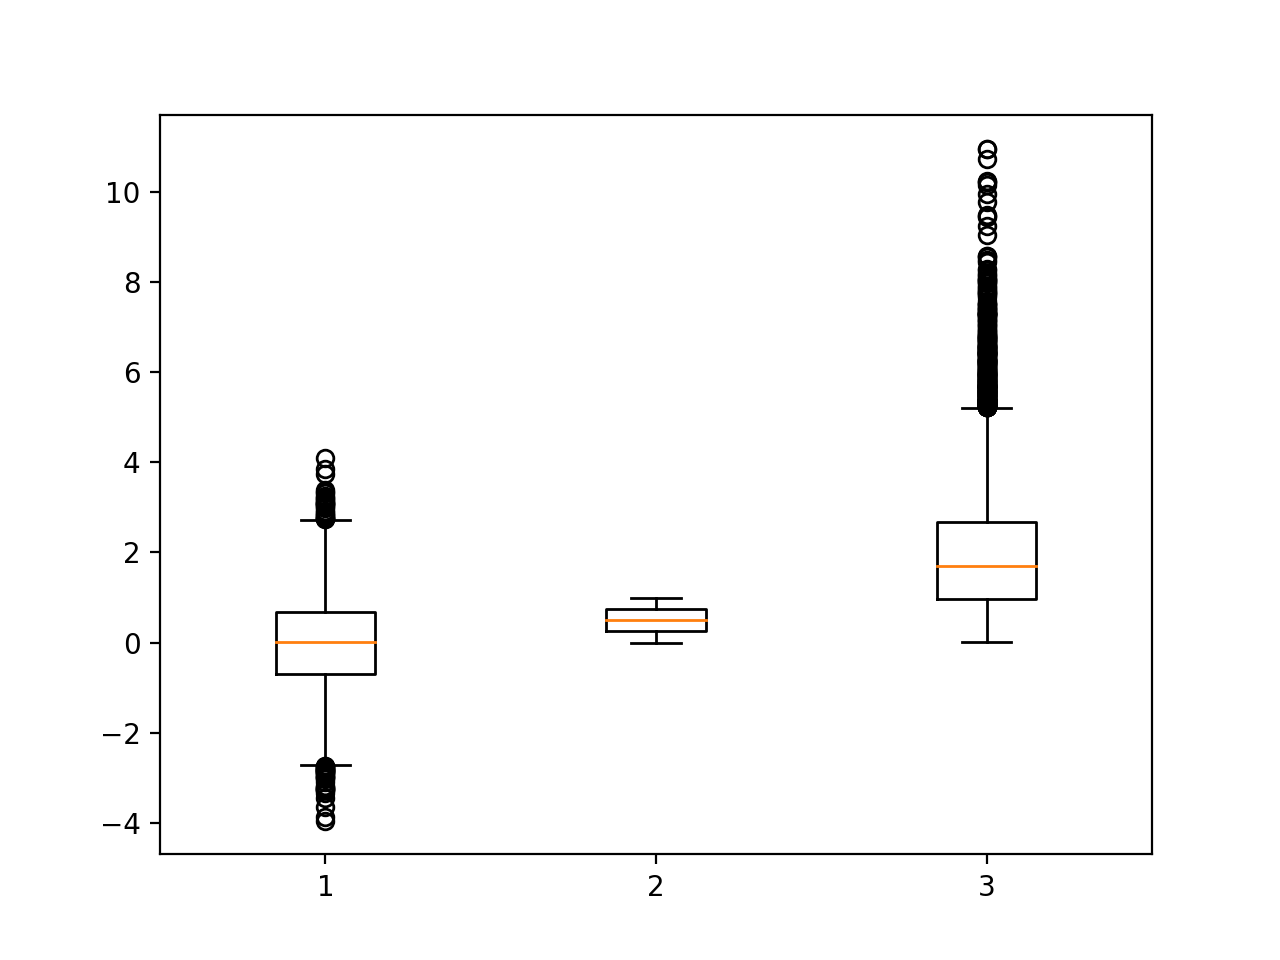

In [36]:
plt.figure()
_ = plt.boxplot([ df['normal'], df['random'], df['gamma'] ] )

## Heatmaps - 2dim histograms
Heatmaps are a way to visualize three-dimensional data and to take advantage of spatial proximity of those dimensions. For instance heatmaps are really quite powerful for weather data. You have two dimensions, latitude and longitude, and then we can overlay on top of this a third dimension, e.g. temperature or rainfall amounts and use color to indicate its intensity. 
If you increase the bins you get the same effect as with histogramms. Every data point starts to fall into its own category.

In general there are two different ways, a heatmap, where you have an X, a Y, and a color dimension, and a scatterplot, where you have two histograms, one for each axis. 
Which of these approaches when having density graphs is on personal preference.

<IPython.core.display.Javascript object>


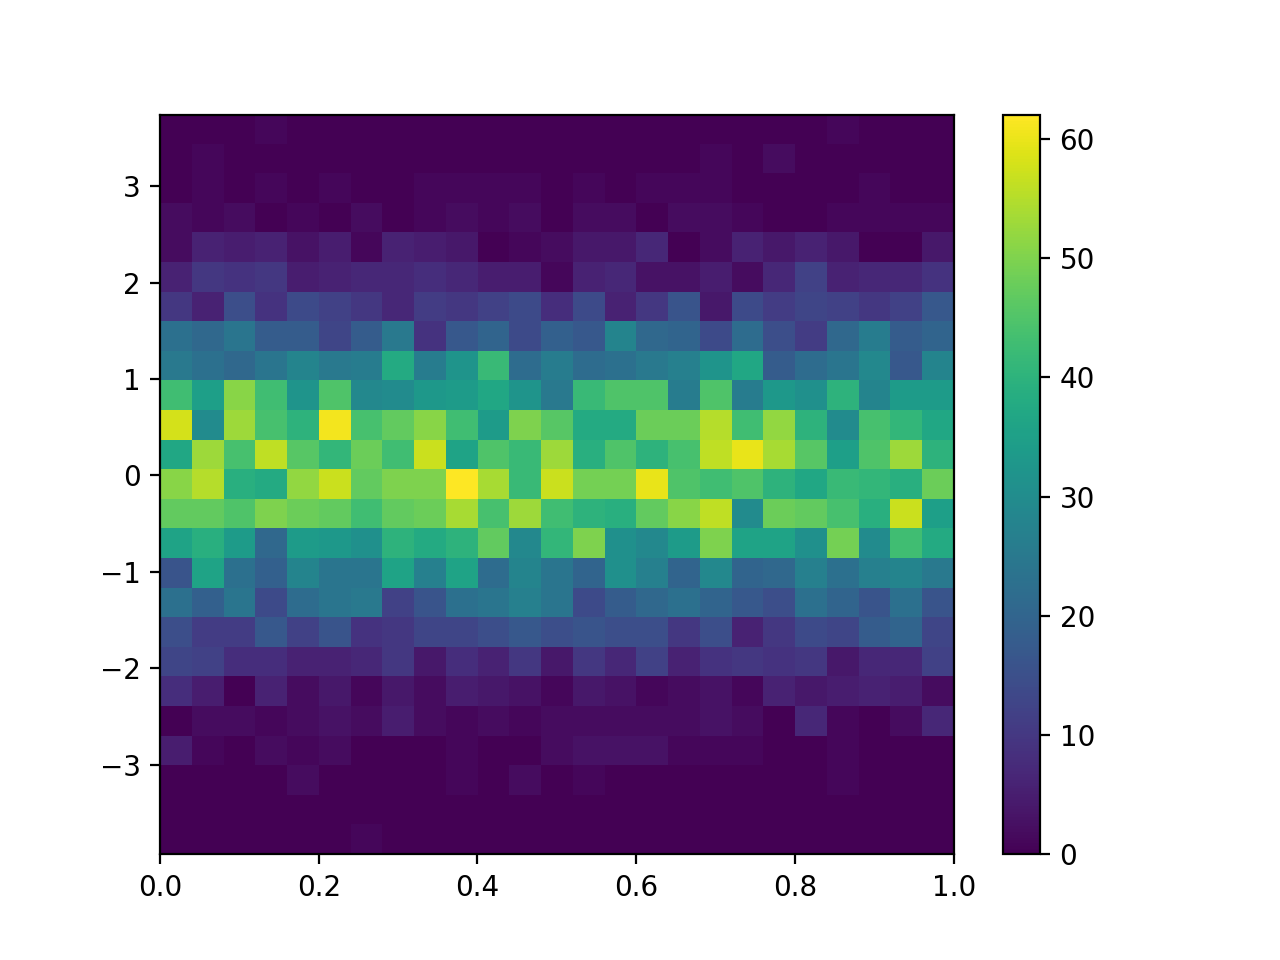

In [22]:
plt.figure()
Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
_ = plt.hist2d(X, Y, bins=25) # for more granularity raise bins
# add a colorbar legend
plt.colorbar()

# Animation & Interactivity
## Animation
Animation and interactivity heavily depend on support from this backend layer. And using a backend like the image png1 doesn't provide this. However, the NBN backend or the matplotlib notebook magic function does provide for some interactivity.

`FuncAnimation` like other classes of the animation package is a subclass of the animation object. IT builds an animation by iteratively calling a user defined function. Essentially, this will either clear the axis object and redraw the next frame, taht users should see next or will return a list of objects which need to be redrawn. 
The animation object has a handy safe function, which allows you to write the animation to a file. This requires additional third party library such as FFM page.
A figure animation with four sub-plots could be plotted animated using the samples for the normal distribution in one, for a gamma distribution in another, and then maybe a couple of paramaterized distributions like the normal distribution with different levels of standard deviation. It would require to manage multiple sub-plots within an animation using histograms. 

In [5]:
from IPython.core.interactiveshell import InteractiveShell

# Set shell to show all lines of output
InteractiveShell.ast_node_interactivity = 'all'

import matplotlib.animation as animation
n = 100
x = np.random.randn(n)
# create the function that will do the plotting, where curr is the current frame
def update(curr):
    # check if animation is at the last frame, and if so, stop the animation a
    if curr == n: 
        a.event_source.stop()
    plt.cla()
    # half step increments use arange to ensure that the bins don't change
    bins = np.arange(-4, 4, 0.5) 
    plt.hist(x[:curr], bins=bins)
    # set the axis values since otherwise, the histogram will continually autoscale between frames
    plt.axis([-4,4,0,30])
    plt.gca().set_title('Sampling the Normal Distribution')
    plt.gca().set_ylabel('Frequency')
    plt.gca().set_xlabel('Value')
    # annotate how many samples currently renderd to the screen
    plt.annotate('n = {}'.format(curr), [3,27])

In [6]:
fig = plt.figure()
a = animation.FuncAnimation(fig, update, interval=100)

FigureCanvasNbAgg()

## Interactivity
The canvas object handles all of the drawing events and it's tightly connected with a given back end.
Interaction is by handling event objects. Events are wiring up to an event listener. In the example below, get the current figure and its canvas subject then call the mpl_connect function. Passing in the string for button_press_event as well as reference to the function onclick, which will be call when the event is detected. 

The Matplotlib documentation describes all events to listen from. But whether they work or not, depends on the backend, and some backends are not interactive. 

The pick event allows you to respond when the user is actually clicked on a visual element in the figure. Whereby the mouse doesn't have to click directly on a rendered object that can be up to 5 pixels away and it should find the closest object. 

Pythons lack of static typing has an unfortunate side effect and it matches the documentation for features like events is buried or missing. 

In [7]:
plt.figure()
data = np.random.rand(10)
plt.plot(data)
def onclick(event):
    plt.cla()
    plt.plot(data)
    plt.gca().set_title('Event at pixels {},{} \nand data {},{}'.format(event.x, event.y, event.xdata, event.ydata))
# tell mpl_connect we want to pass a 'button_press_event' into onclick when the event is detected
plt.gcf().canvas.mpl_connect('button_press_event', onclick)

FigureCanvasNbAgg()

<Figure size 640x480 with 0 Axes>

6

In [17]:
from random import shuffle
origins = ['China', 'Brazil', 'India', 'USA', 'Canada', 'UK', 'Germany', 'Iraq', 'Chile', 'Mexico']
# randomize list with shuffle
shuffle(origins)
df = pd.DataFrame({'height': np.random.rand(10),
                   'weight': np.random.rand(10),
                   'origin': origins})
df

height    weight   origin
0  0.114999  0.080354    China
1  0.953798  0.758466       UK
2  0.367529  0.526912    Chile
3  0.991507  0.758099      USA
4  0.911662  0.804033   Canada
5  0.194961  0.992594   Brazil
6  0.241433  0.310784  Germany
7  0.995546  0.343652    India
8  0.335612  0.077297     Iraq
9  0.407317  0.549345   Mexico

4

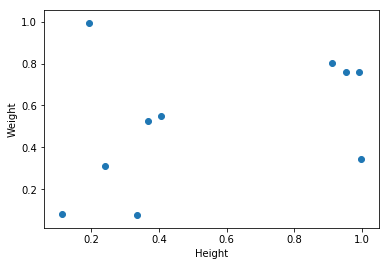

In [18]:
plt.figure()
# picker=5 means the mouse doesn't have to click directly on an event, but can be up to 5 pixels away
plt.scatter(df['height'], df['weight'], picker=5)
plt.gca().set_ylabel('Weight')
plt.gca().set_xlabel('Height')
def onpick(event):
    origin = df.iloc[event.ind[0]]['origin']
    plt.gca().set_title('Selected item came from {}'.format(origin))

# tell mpl_connect we want to pass a 'pick_event' into onpick when the event is detected
plt.gcf().canvas.mpl_connect('pick_event', onpick)

# Styles
You can also choose the plot kind by using the DataFrame.plot.kind methods instead of providing the kind keyword argument.
kind :
* 'line' : line plot (default)
* 'bar' : vertical bar plot
* 'barh' : horizontal bar plot
* 'hist' : histogram
* 'box' : boxplot
* 'kde' : [Kernel density estimation plots](https://en.wikipedia.org/wiki/Kernel_density_estimation) are useful for deriving a smooth continuous function from a given sample.
* 'density' : same as 'kde'
* 'area' : area plot
* 'pie' : pie plot
* 'scatter' : scatter plot
* 'hexbin' : hexbin plot

[Iris flower data set](https://en.wikipedia.org/wiki/Iris_flower_data_set)

In [11]:
# see the pre-defined styles provided.
plt.style.available
# use the 'seaborn-colorblind' style
plt.style.use('seaborn-colorblind')

In [23]:
# see the pre-defined styles provided.
plt.style.available

['seaborn-notebook',
 'seaborn-deep',
 'seaborn',
 'seaborn-dark',
 'dark_background',
 'ggplot',
 'seaborn-dark-palette',
 'bmh',
 'grayscale',
 'seaborn-white',
 'seaborn-talk',
 'seaborn-darkgrid',
 'seaborn-whitegrid',
 '_classic_test',
 'seaborn-bright',
 'seaborn-pastel',
 'seaborn-paper',
 'seaborn-muted',
 'seaborn-poster',
 'seaborn-colorblind',
 'fivethirtyeight',
 'seaborn-ticks',
 'classic']

In [12]:
np.random.seed(123)

df = pd.DataFrame({'A': np.random.randn(365).cumsum(0), 
                   'B': np.random.randn(365).cumsum(0) + 20,
                   'C': np.random.randn(365).cumsum(0) - 20}, 
                  index=pd.date_range('1/1/2017', periods=365))
df.head()

A          B          C
2017-01-01 -1.085631  20.059291 -20.230904
2017-01-02 -0.088285  21.803332 -16.659325
2017-01-03  0.194693  20.835588 -17.055481
2017-01-04 -1.311601  21.255156 -17.093802
2017-01-05 -1.890202  21.462083 -19.518638

<IPython.core.display.Javascript object>


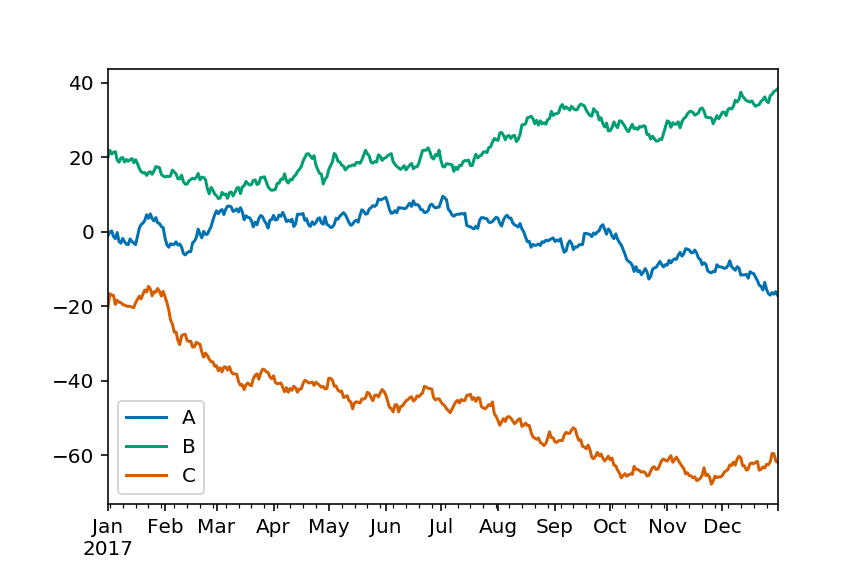

In [8]:
df.plot();

<IPython.core.display.Javascript object>


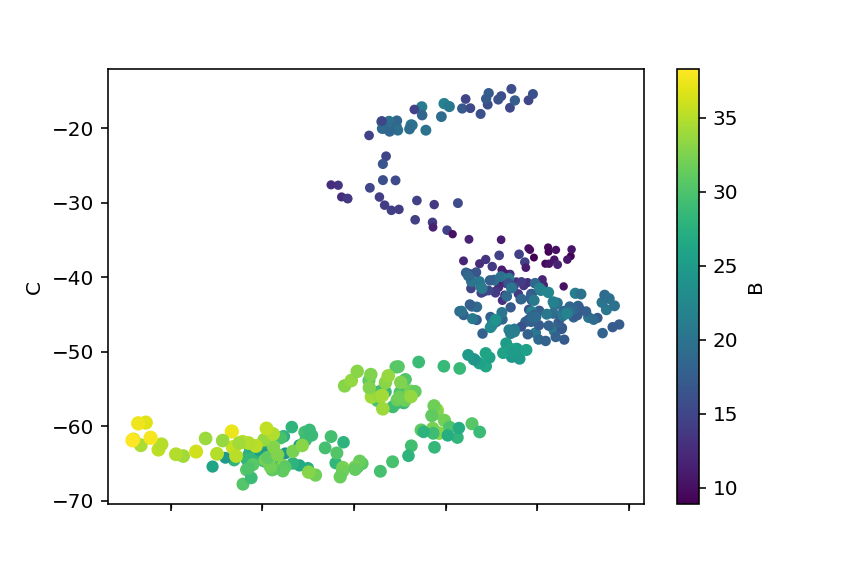

In [9]:
# create a scatter plot of columns 'A' and 'C', with changing color (c) and size (s) based on column 'B'
df.plot.scatter('A', 'C', c='B', s=df['B'], colormap='viridis')

<IPython.core.display.Javascript object>


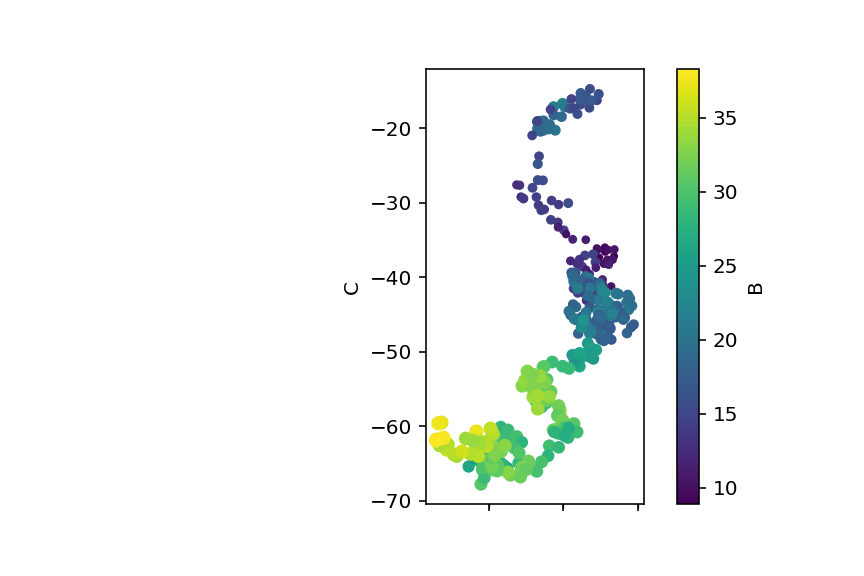

In [10]:
ax = df.plot.scatter('A', 'C', c='B', s=df['B'], colormap='viridis')
ax.set_aspect('equal') # equals aspect ratio

<IPython.core.display.Javascript object>


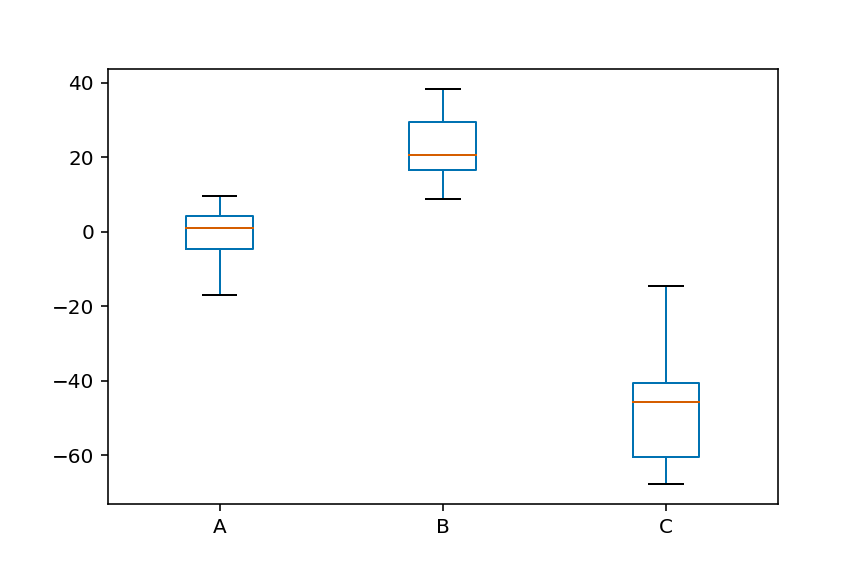

In [13]:
df.plot.box();

<IPython.core.display.Javascript object>


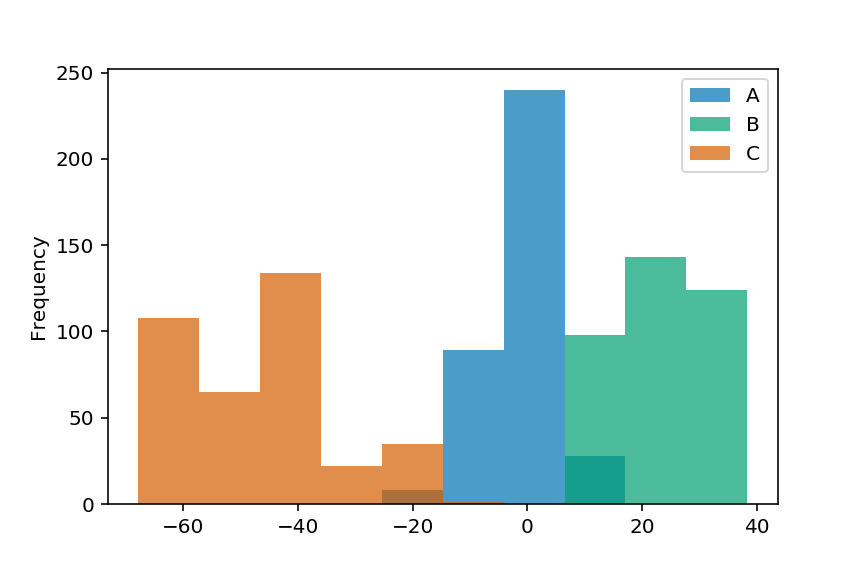

In [14]:
df.plot.hist(alpha=0.7);

<IPython.core.display.Javascript object>


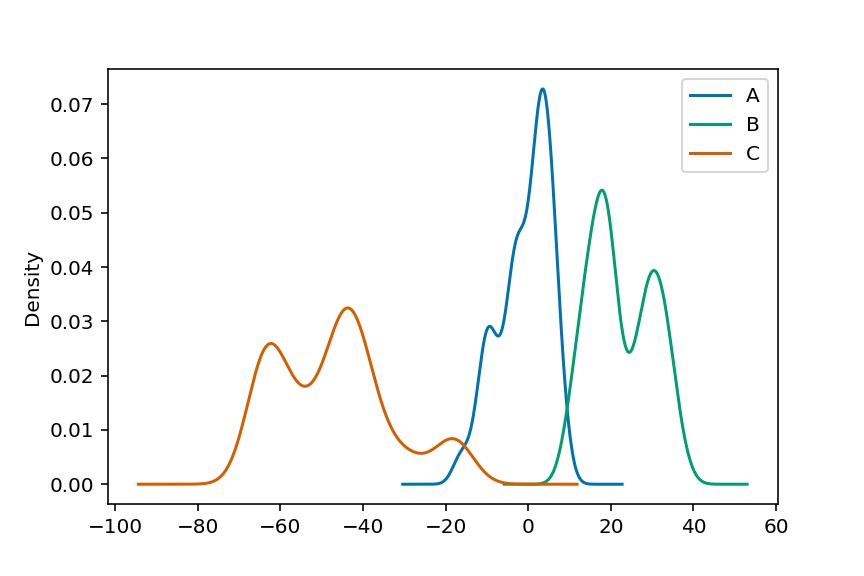

In [16]:
df.plot.kde();

In [20]:
iris = pd.read_csv('iris.csv')
iris.head()


SepalLength  SepalWidth  PetalLength  PetalWidth         Name
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
4          5.0         3.6          1.4         0.2  Iris-setosa

<IPython.core.display.Javascript object>


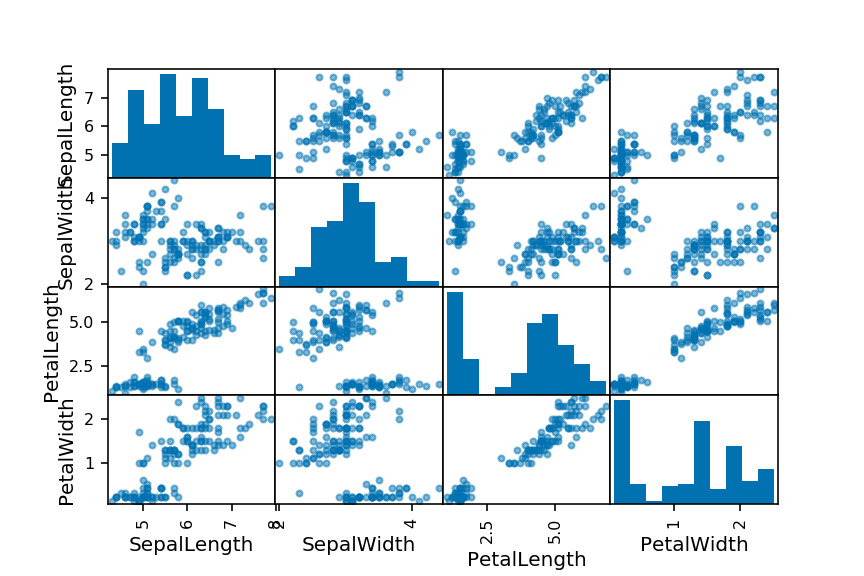

In [21]:
pd.tools.plotting.scatter_matrix(iris);

<IPython.core.display.Javascript object>


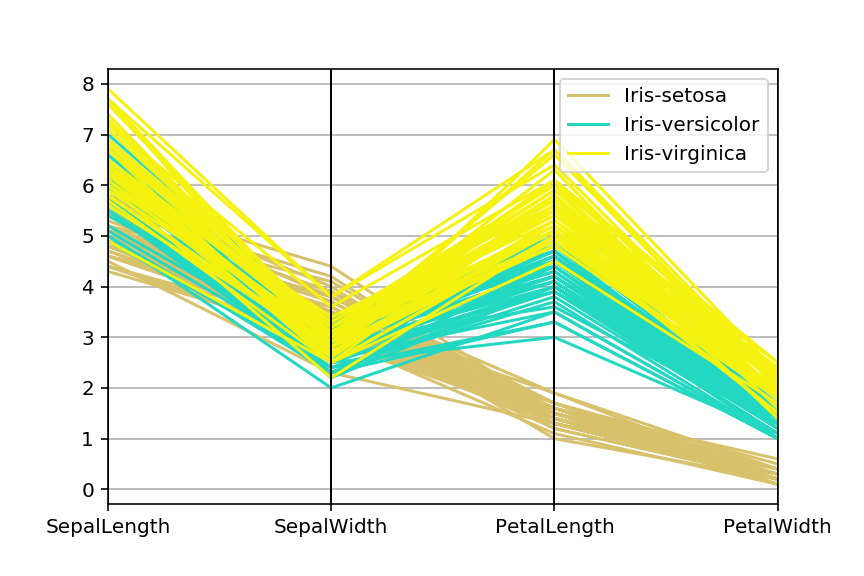

In [22]:
plt.figure()
pd.tools.plotting.parallel_coordinates(iris, 'Name');

## Seaborn
Seaborn is just a wraparound matplotlib. It adds styles to make default data visualizations much more visually appealing and makes creation of specific types of complicated plots much simpler. It not only adds new styles and visual aspects. But also introduces new functionality such as **joint plots**, **scatter matrix plots**, and **violin plots**. 
Seaborn is being actively developed, and is easy to install, which makes it an indispensible part of a data scientist's toolkit. However functionality built on top of matplotlib, and these are largely matplotlib artists being used. 

Some of the plotting functions in Seaborn return a matplotlib axis object. While others operate on an entire figure and produce plots with several panels, returning a Seaborn grid object.

In both cases, matplotlib can be used to further tweak the plots. For example, sns.jointplot returns a Seaborn grid object. 

The hexbin style of plot works well with relatively large data sets. Another good option for visualizing the distribution of data sets is kernel density estimations or KDE plots. You can think of two dimensional KDE plots as the continuous version of the hexbin jointplot. 

In [17]:
import seaborn as sns

np.random.seed(1234)

v1 = pd.Series(np.random.normal(0,10,1000), name='v1')
v2 = pd.Series(2*v1 + np.random.normal(60,15,1000), name='v2')

Pandas series v1 contains 1000 numbers drawn from a normal distribution with a mean of 0, and a standard deviation of 10. Second pandas series, v2, which is 2 times v1, plus 1,000 numbers drawn from a normal distribution with a mean of 60 and standard deviation of 15. 

<IPython.core.display.Javascript object>


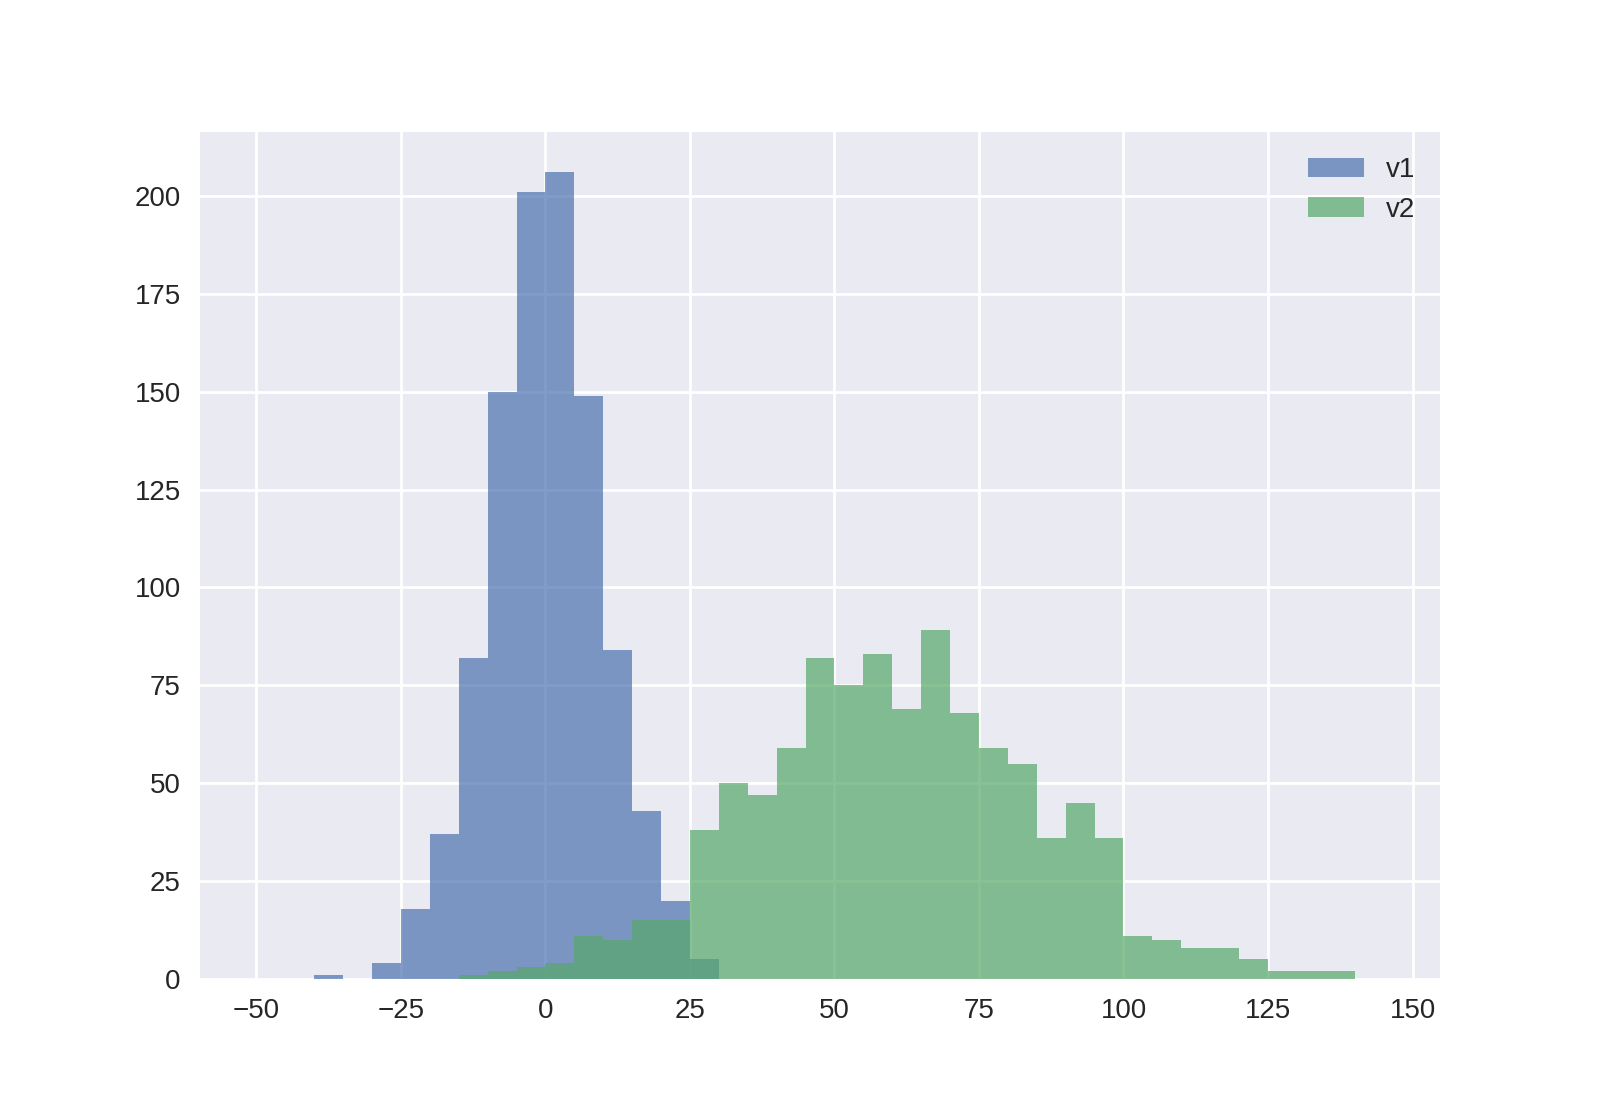

In [18]:
plt.figure()
plt.hist(v1, alpha=0.7, bins=np.arange(-50,150,5), label='v1');
plt.hist(v2, alpha=0.7, bins=np.arange(-50,150,5), label='v2');
plt.legend();

<IPython.core.display.Javascript object>


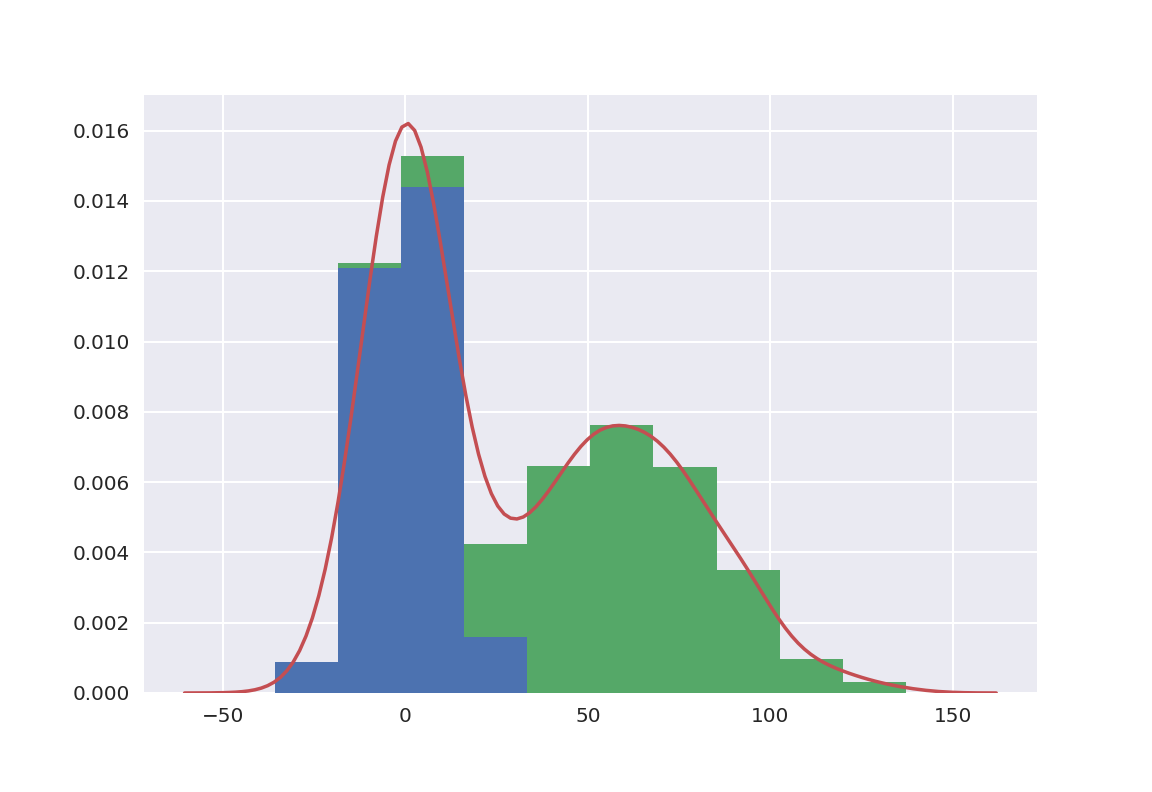

In [29]:
# plot a kernel density estimation over a stacked barchart
plt.figure()
plt.hist([v1, v2], histtype='barstacked', normed=True);
v3 = np.concatenate((v1,v2))
sns.kdeplot(v3);

<IPython.core.display.Javascript object>


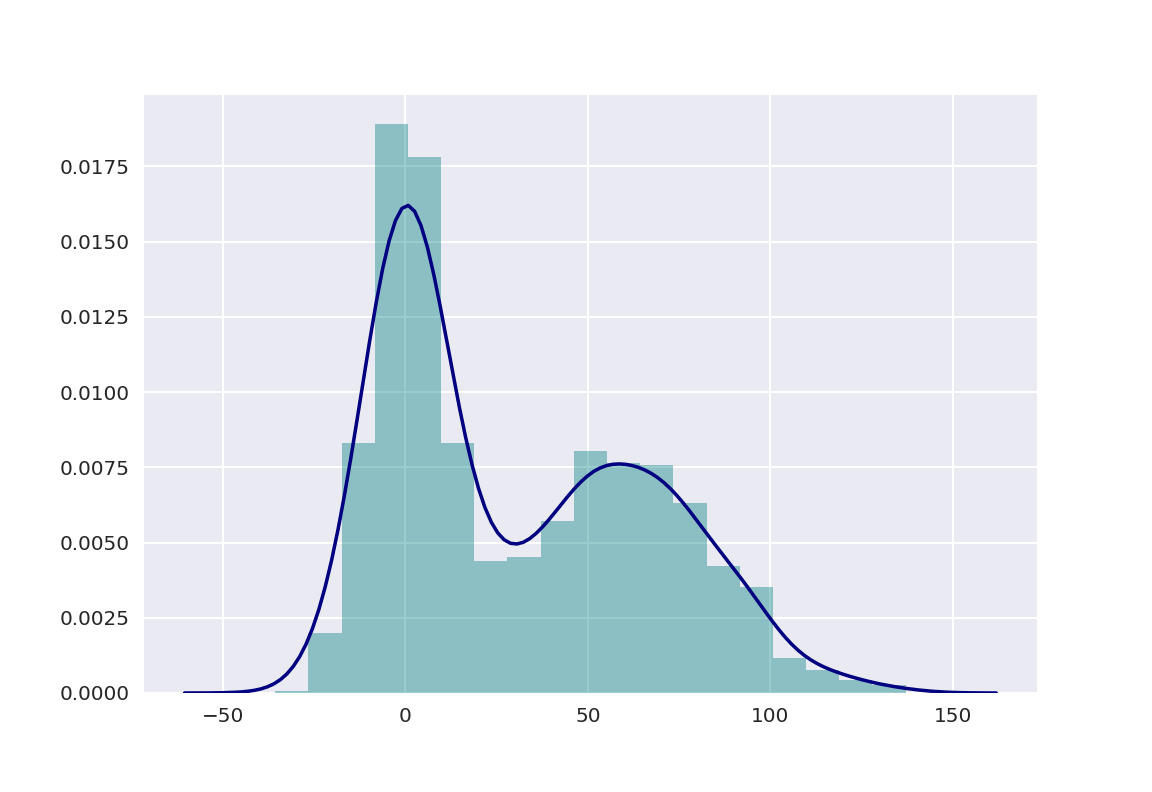

In [27]:
plt.figure()
# we can pass keyword arguments for each individual component of the plot
sns.distplot(v3, hist_kws={'color': 'Teal'}, kde_kws={'color': 'Navy'});

### Joinplot
The jointplot creates a scatterplot along the histograms for each individual variable on each axis. To create a jointplot, we just type sns.jointplot and pass in the two series, v1 and v2.
Setting alpha to 0.4 will help with visualizing overlapping points. The jointplot allows us to visualize the distribution of the two variables individually. As well as relationships between the variables. Using jointplot we can see that v1 and v2 appear to be normally distributed variables that are positively correlated. Because Seaborn uses matplotlib we can tweak the plots using Matplotlib's tools. 

<IPython.core.display.Javascript object>


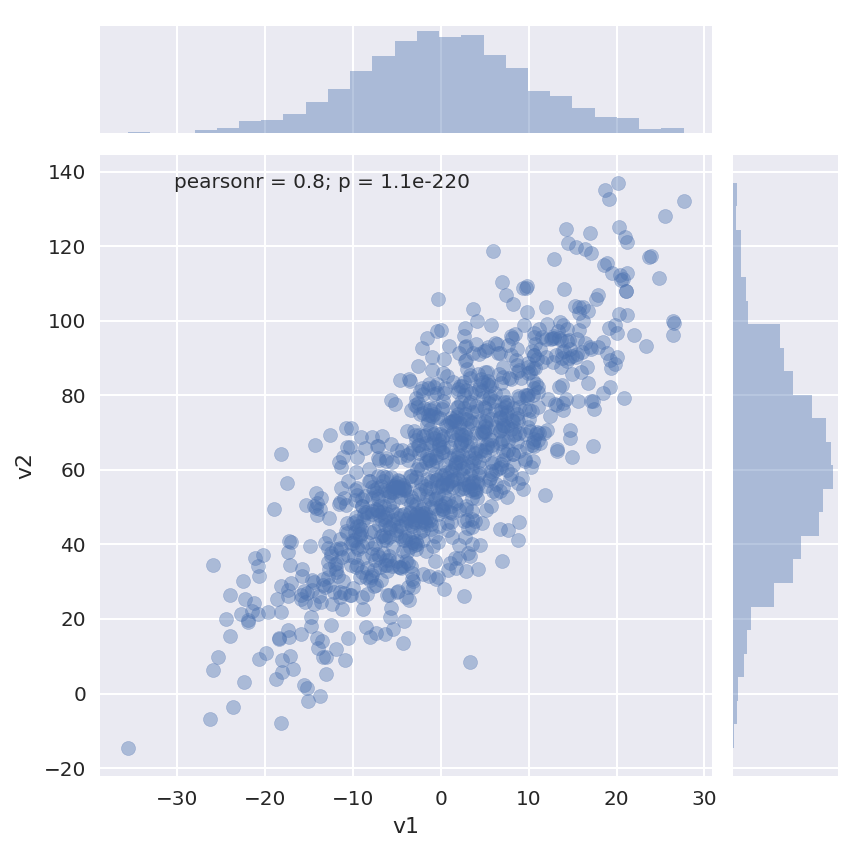

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


In [30]:
sns.jointplot(v1, v2, alpha=0.4);

<IPython.core.display.Javascript object>


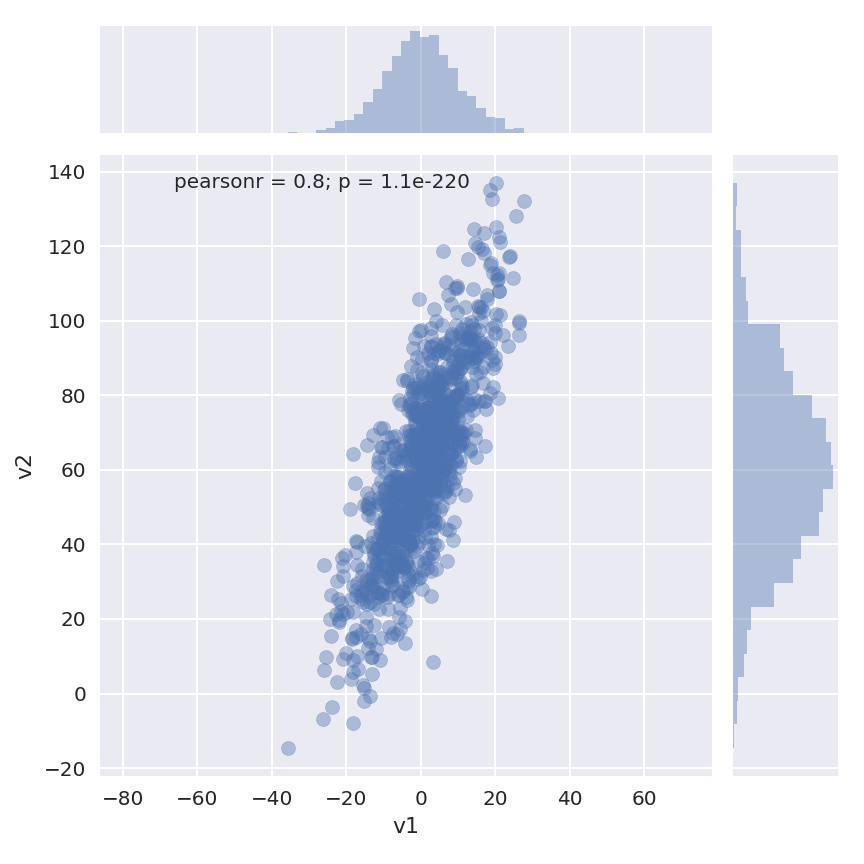

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


In [31]:
grid = sns.jointplot(v1, v2, alpha=0.4);
grid.ax_joint.set_aspect('equal')

<IPython.core.display.Javascript object>


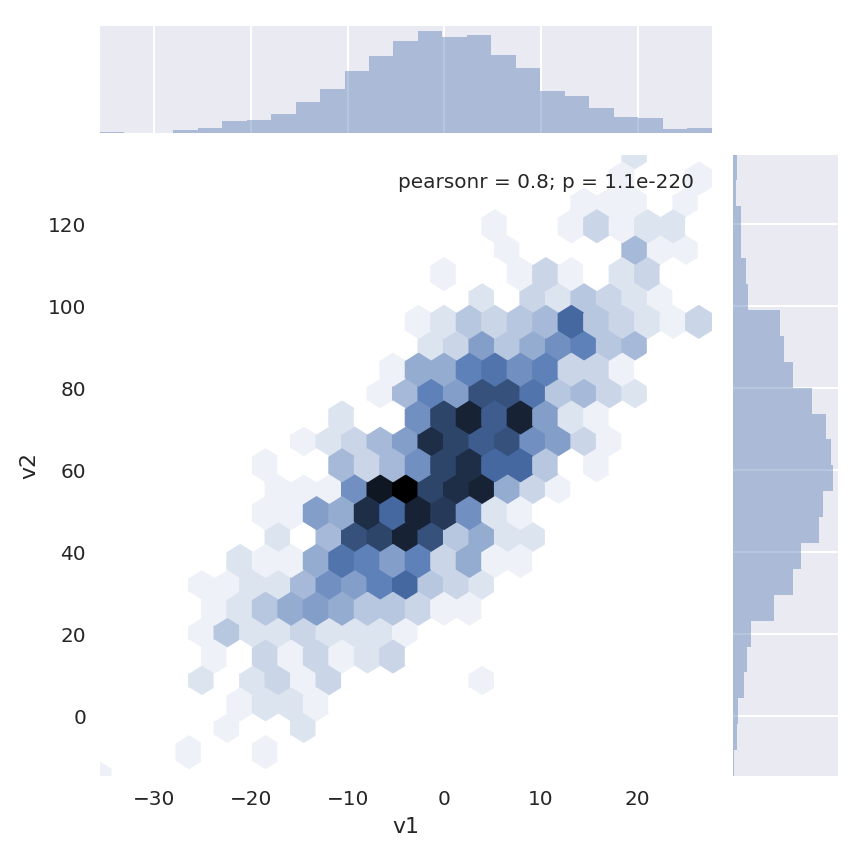

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


In [32]:
sns.jointplot(v1, v2, kind='hex');

<IPython.core.display.Javascript object>


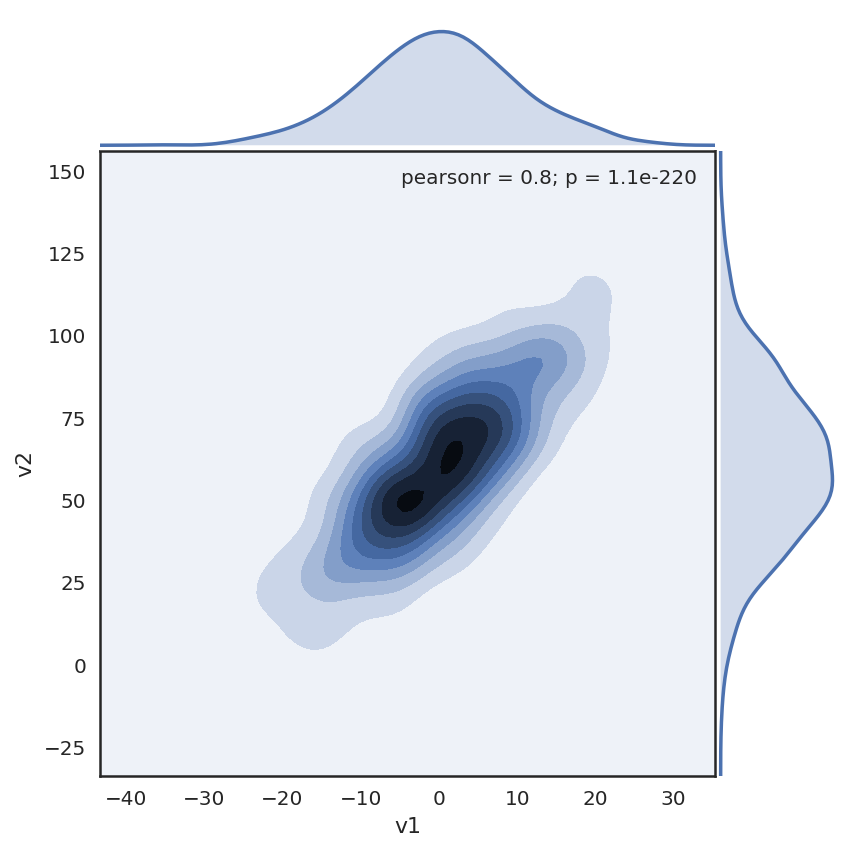

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


In [33]:
# set the seaborn style for all the following plots
# Finally, let's space to 0, which will plot the marginal distributions 
# directly on the border of the scatter plot.
sns.set_style('white')
sns.jointplot(v1, v2, kind='kde', space=0);

<IPython.core.display.Javascript object>


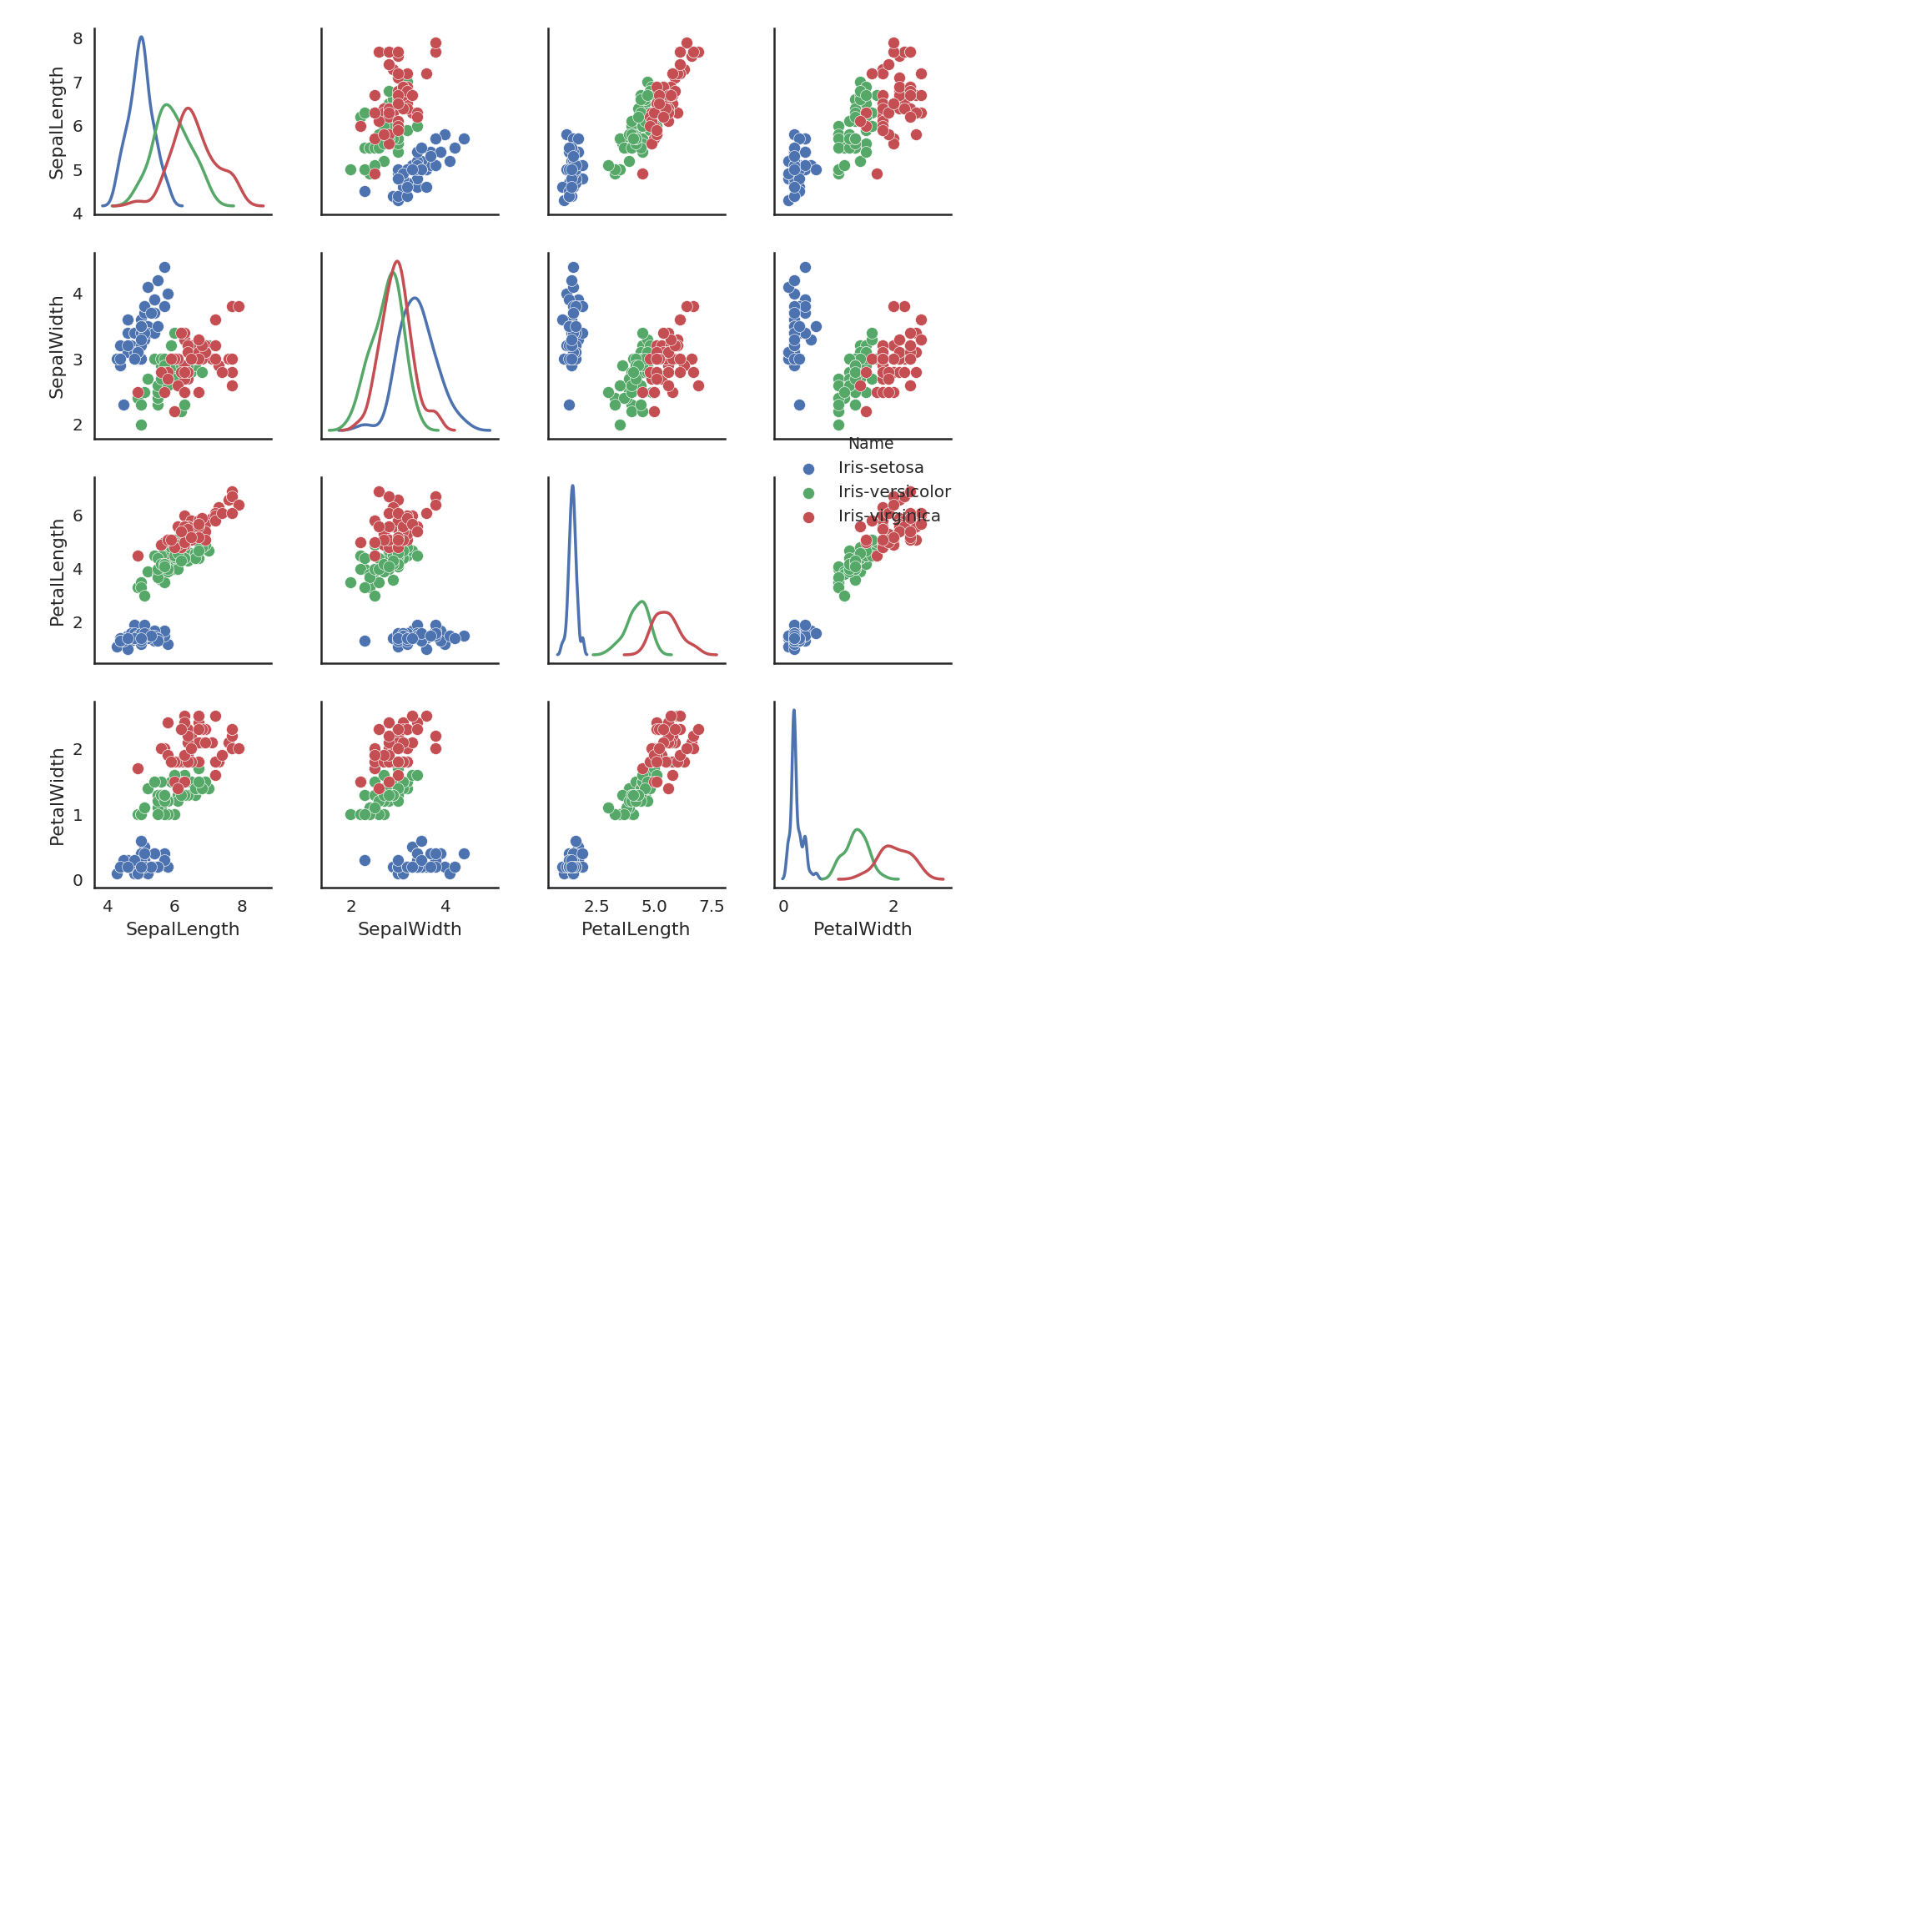

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


In [34]:
# eaborn has a built in function that creates a scatterplot matrix. 
# Tell it to map name to different colors using the hue parameter. 
sns.pairplot(iris, hue='Name', diag_kind='kde', size=2);

### violin plot
Violin plots convey more information than box plots and are able to show particular phenomena within the distribution that box plots are unable to convey such as multi modality. Seaborn is a library that not only adds new styles and visual aspects. But also introduces new functionality such as joint plots, scatter matrix plots, and violin plots. 

<IPython.core.display.Javascript object>


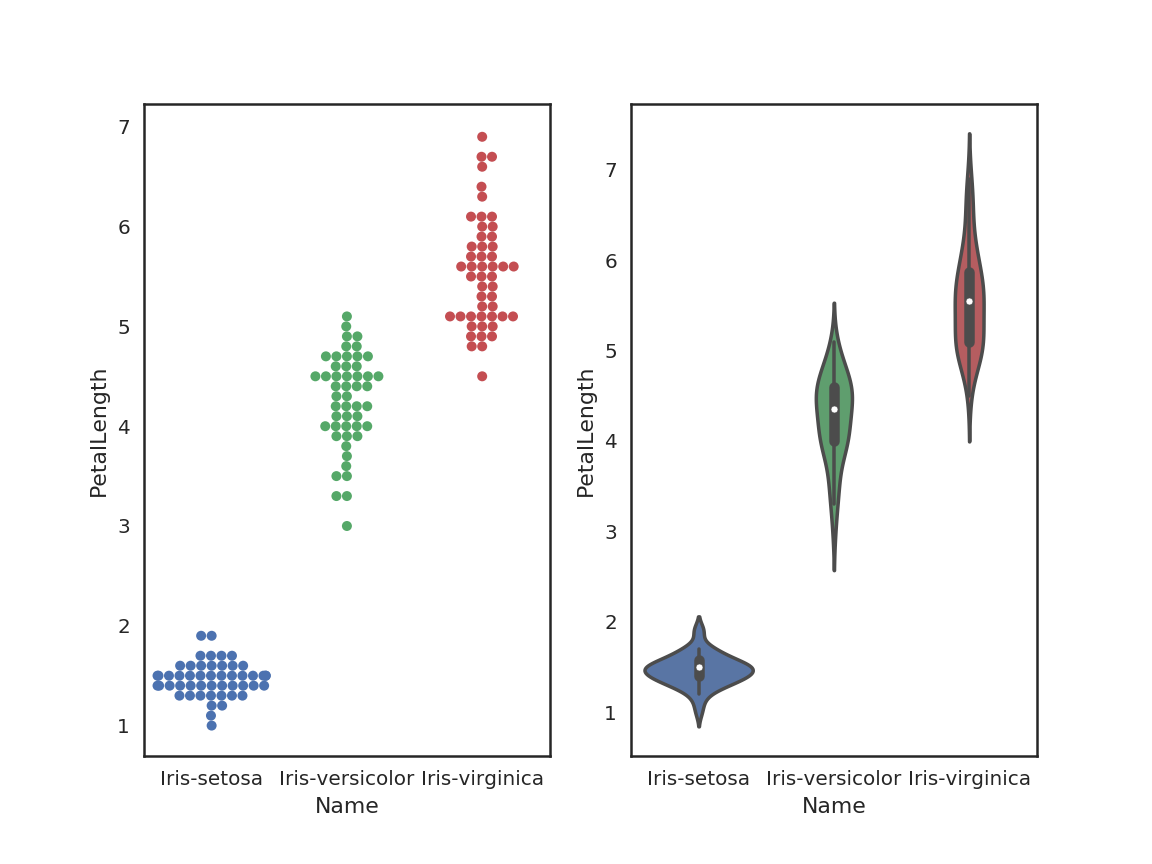

In [35]:
# violin plot.
plt.figure(figsize=(8,6))
plt.subplot(121)
sns.swarmplot('Name', 'PetalLength', data=iris);
plt.subplot(122)
sns.violinplot('Name', 'PetalLength', data=iris);